In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import pickle

### Dataset Loading

In [3]:
# Load Dataset
# https://drive.google.com/file/d/1oSP_h_eVcZOv3A8WqUcDUmmQQy1-tsmb/view?usp=sharing
# df = pd.read_csv("data_cardiovascular_risk.csv")
df = pd.read_csv("https://drive.google.com/uc?id=1oSP_h_eVcZOv3A8WqUcDUmmQQy1-tsmb")

### Dataset First View

In [4]:
# Dataset First Look
df.head()

### Look for Education attribute that what it means in CHD (Coronary heart disease). 

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

In [6]:
# Columns/Attributes names
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

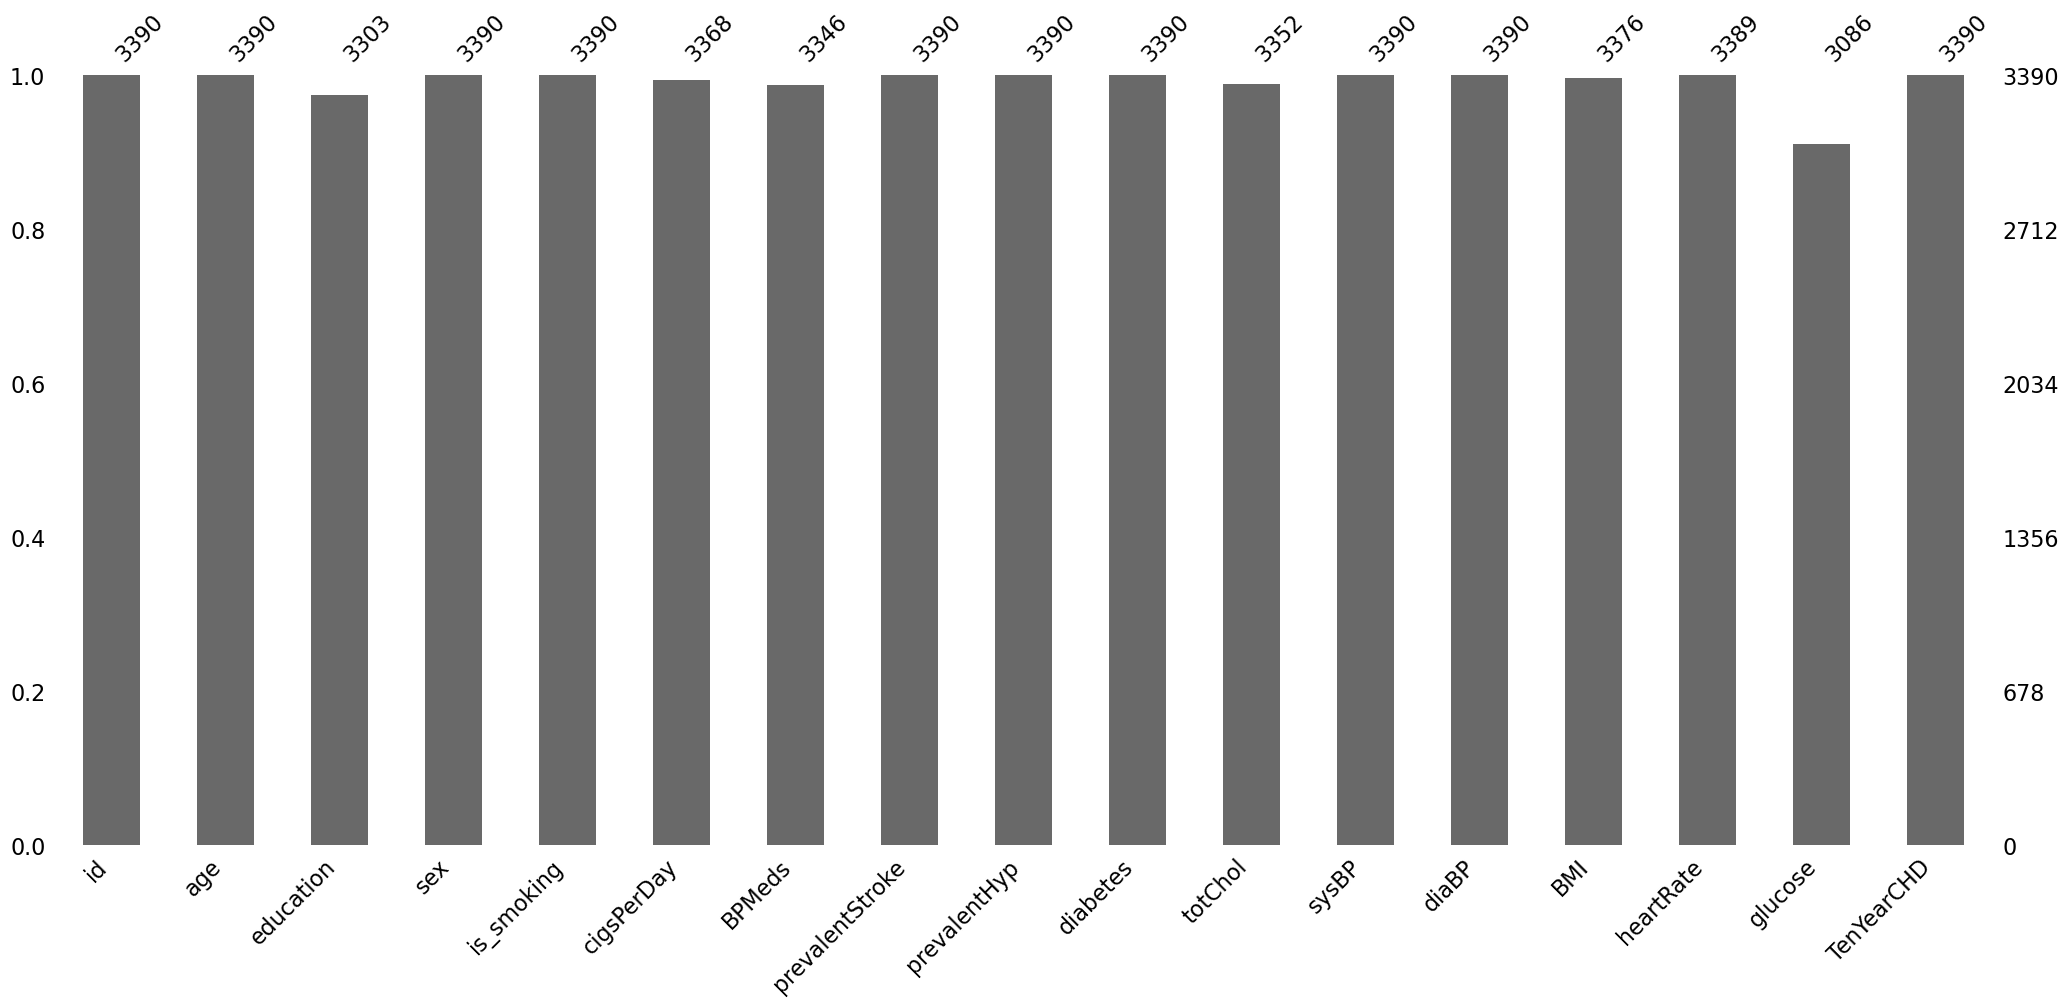

In [10]:
# Visualizing the missing values
msno.bar(df)

<Axes: >

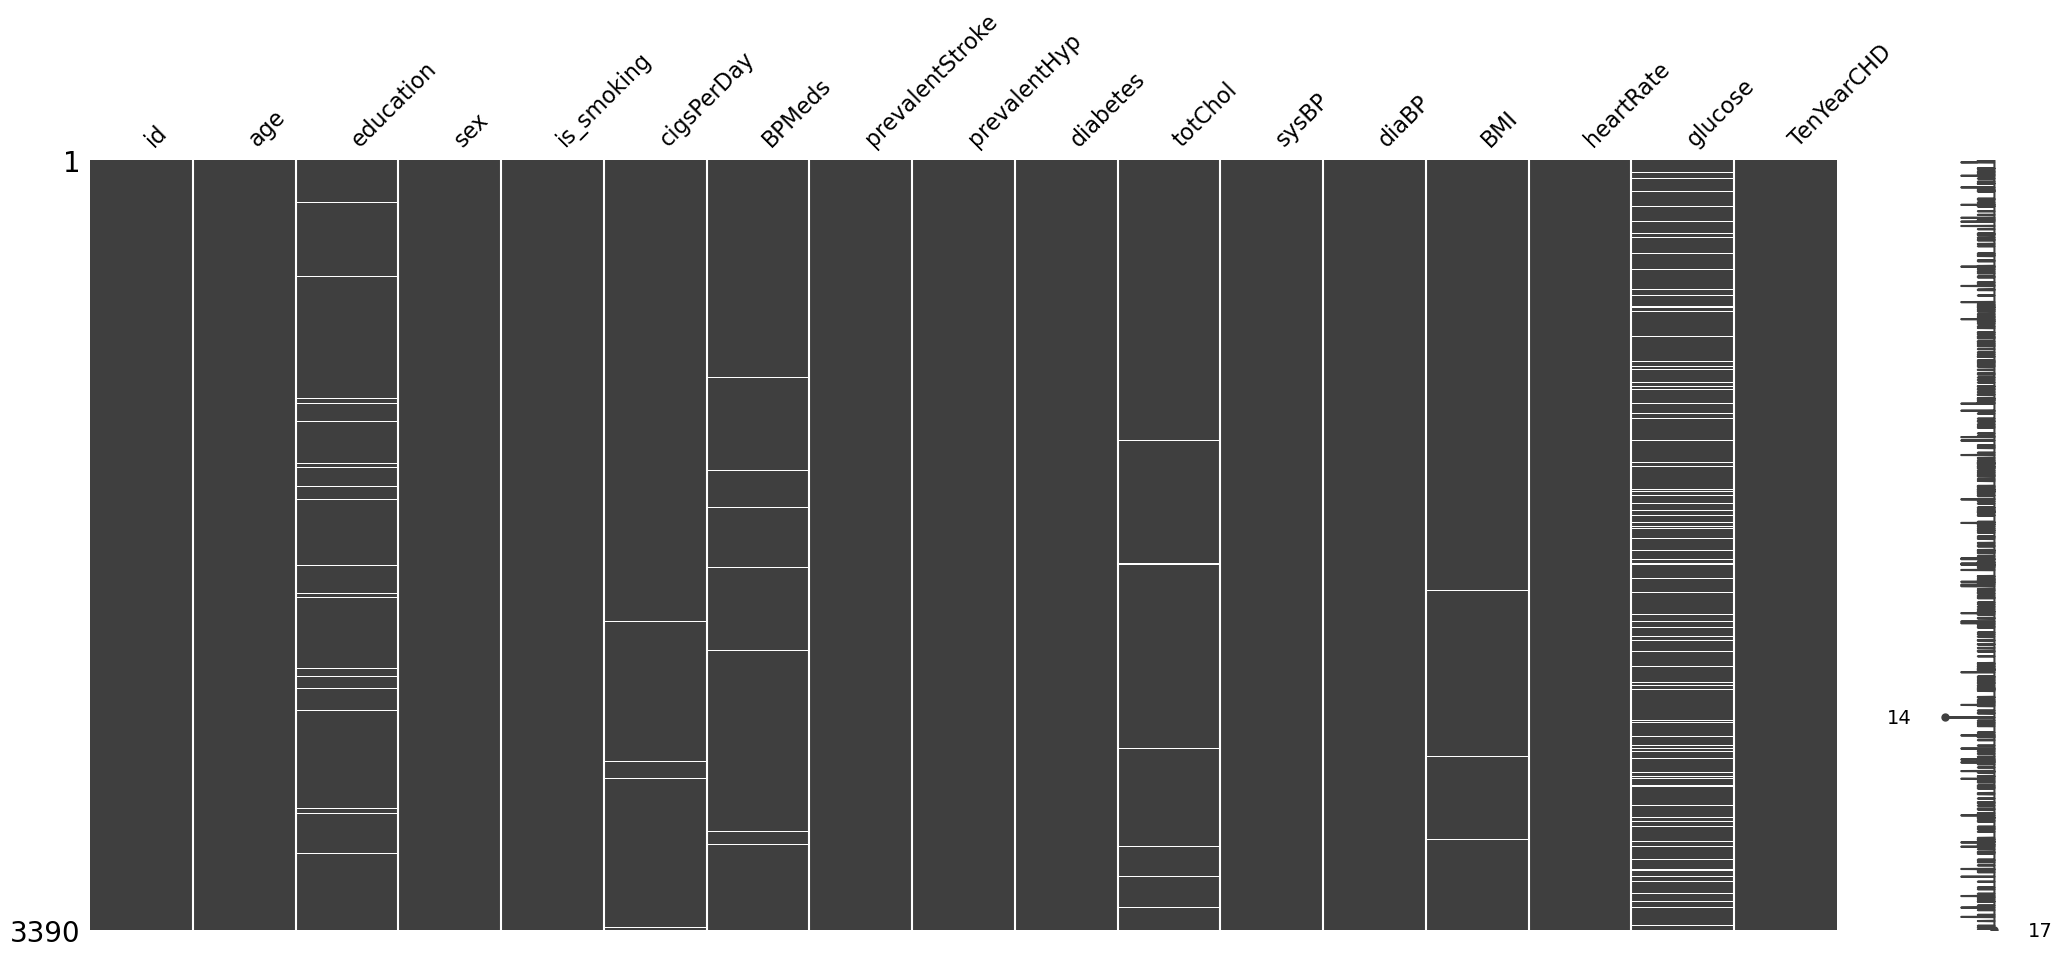

In [11]:
# NULL/MISSING values visualisation using "MATRIX-plot" of MISSINGNO library.
msno.matrix(df)

In [12]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe()


,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description 

- **ID -** Ids are just randon number given to the randon people who participated in this survey.
- **Age -** Age column represents the age of the particpants.
- **SEX -** This columns defines the gender of the participants.
- **IS_SMOKING -** This attribute refers weather a person smokes or not.
- **CIGSPERDAY -** Cigs per day explains that how many cigarettes are being consumed by an individual.
- **BPMeds -** BPMeds explains weather a person taking Bood-Pressure Medicines or not.
- **prevalentStroke -** Prevalent Stroke means if the patient has the history of stroke.
- **prevalentHyp -** If the patient has a history of hypertension.
- **DIABETES -** Patient has Diabetes or not.
- **totChol -** Cholesterol Mesurement.
- **sysBP-** High BP measurement.
- **diaBP-** Low BP measurement.
- **BMI-** Body mass index.
- **heartRate-** heart rate measurement.
- **glucose-** Glucose density present in blood.
- **TenYearCHD-** Heart related disease in upcoming 10 years. 

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
# HERE WE HAVE FIND THE TOTAL COUNT AND IT'S VALUES. 
for i in df:
  print(f"Total Count of Unique values of {i} column - {df[i].nunique()}\n")
  print(f"Total Unique Values of {i} column - {df[i].unique()}\n")
  print("===================================================================================================\n") 

Total Count of Unique values of id column - 3390

Total Unique Values of id column - [   0    1    2 ... 3387 3388 3389]


Total Count of Unique values of age column - 39

Total Unique Values of age column - [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]


Total Count of Unique values of education column - 4

Total Unique Values of education column - [ 2.  4.  1.  3. nan]


Total Count of Unique values of sex column - 2

Total Unique Values of sex column - ['F' 'M']


Total Count of Unique values of is_smoking column - 2

Total Unique Values of is_smoking column - ['YES' 'NO']


Total Count of Unique values of cigsPerDay column - 32

Total Unique Values of cigsPerDay column - [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]


Total Count of Unique values of BPMeds column - 2

Total Unique Values of BPMeds column - [ 0. nan  1.]



## ***3.Data Wrangling***

 **(cigsPerDay) Total cigrattes per day exploration with age groups .** 
- Chemicals in cigarette smoke cause the blood to thicken and form clots inside veins and arteries. 
- Blockage from a clot can lead to a heart attack and sudden death.
- MIN. and MAX. age of patient's are 32yrs & 70yrs.
- We have divided age columns in 4-age groups as age1, age2, age3 & age4.
- All age groups have their range mentioned below.


In [15]:
# Divided age column into 4 groups.
age1 = df[df['age'] <= 40]
age2 = df[(df['age'] > 40) & (df['age'] <= 50)]
age3 = df[(df['age'] > 50) & (df['age'] <= 60)]
age4 = df[(df['age'] > 60) & (df['age'] <= 70)]

In [16]:
# Total cigrattes consumed at the age group of (age1) 32-40yrs. old
print(f"total Cigrattes {age1['cigsPerDay'].sum()}")
print()
print(age1.groupby(["age", "sex"])["cigsPerDay"].sum().reset_index(name ='Total Cigrattes per day'))

total Cigrattes 6813.0

    age sex  Total Cigrattes per day
0    32   F                     15.0
1    33   F                     20.0
2    33   M                      0.0
3    34   F                     80.0
4    34   M                     60.0
5    35   F                     89.0
6    35   M                    223.0
7    36   F                    228.0
8    36   M                    505.0
9    37   F                    460.0
10   37   M                    491.0
11   38   F                    473.0
12   38   M                    765.0
13   39   F                    556.0
14   39   M                   1021.0
15   40   F                    666.0
16   40   M                   1161.0


In [17]:
# Total cigrattes consumed at the age group of (age2) 40-50 yrs. old
print(f"total Cigrattes {age2['cigsPerDay'].sum()}")
print()
print(age2.groupby(["age", "sex"])["cigsPerDay"].sum().reset_index(name ='Total Cigrattes per day'))


total Cigrattes 13833.0

    age sex  Total Cigrattes per day
0    41   F                    507.0
1    41   M                   1064.0
2    42   F                    586.0
3    42   M                   1055.0
4    43   F                    559.0
5    43   M                    968.0
6    44   F                    490.0
7    44   M                   1156.0
8    45   F                    432.0
9    45   M                    794.0
10   46   F                    781.0
11   46   M                    710.0
12   47   F                    667.0
13   47   M                    730.0
14   48   F                    407.0
15   48   M                    890.0
16   49   F                    265.0
17   49   M                    653.0
18   50   F                    460.0
19   50   M                    659.0


In [18]:
# Total ciigrattes consumed at the age group of (age3) 50-60 yrs. old
print(f"total Cigrattes {age3['cigsPerDay'].sum()}")
print()
print(age3.groupby(["age", "sex"])["cigsPerDay"].sum().reset_index(name ='Total Cigrattes per day'))


total Cigrattes 7626.0

    age sex  Total Cigrattes per day
0    51   F                    361.0
1    51   M                    752.0
2    52   F                    276.0
3    52   M                    541.0
4    53   F                    283.0
5    53   M                    667.0
6    54   F                    193.0
7    54   M                    642.0
8    55   F                    167.0
9    55   M                    477.0
10   56   F                    252.0
11   56   M                    455.0
12   57   F                    224.0
13   57   M                    402.0
14   58   F                    251.0
15   58   M                    459.0
16   59   F                    188.0
17   59   M                    514.0
18   60   F                    180.0
19   60   M                    342.0


In [19]:
# Total ciigrattes consumed at the age group of (age4) 60-70 yrs. old
print(f"total Cigrattes {age4['cigsPerDay'].sum()}")
print()
print(age4.groupby(["age", "sex"])["cigsPerDay"].sum().reset_index(name ='Total Cigrattes per day'))


total Cigrattes 2274.0

    age sex  Total Cigrattes per day
0    61   F                    171.0
1    61   M                    296.0
2    62   F                     61.0
3    62   M                    367.0
4    63   F                    144.0
5    63   M                    413.0
6    64   F                    155.0
7    64   M                    246.0
8    65   F                     13.0
9    65   M                     54.0
10   66   F                     20.0
11   66   M                     91.0
12   67   F                     47.0
13   67   M                    111.0
14   68   F                     40.0
15   68   M                     40.0
16   69   F                      0.0
17   69   M                      5.0
18   70   F                      0.0


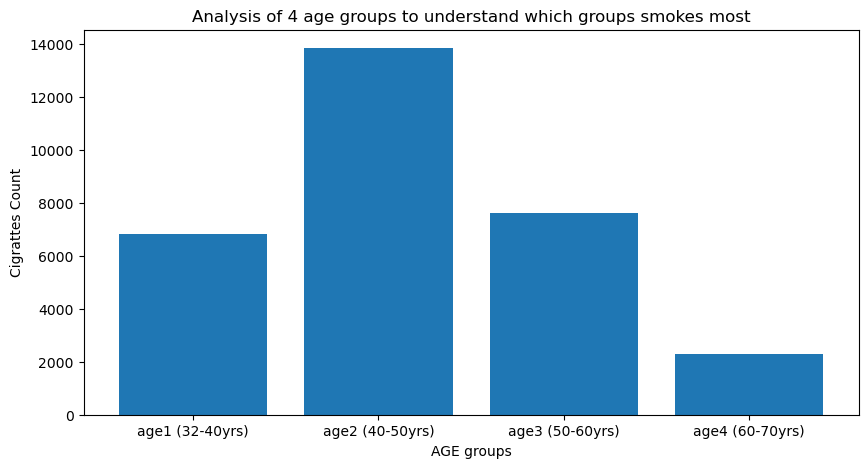

In [20]:
# Importing Library
import matplotlib.pyplot as plt
import numpy as np

# creating the dataset
x = np.array(["age1 (32-40yrs)", "age2 (40-50yrs)", "age3 (50-60yrs)", "age4 (60-70yrs)"])
y = np.array([age1['cigsPerDay'].sum(), age2['cigsPerDay'].sum(), age3['cigsPerDay'].sum(), age4['cigsPerDay'].sum()])

# Bar-plot plotting
fig = plt.figure(figsize = (10, 5))
plt.xlabel("AGE groups")
plt.ylabel("Cigrattes Count")
plt.title("Analysis of 4 age groups to understand which groups smokes most")

plt.bar(x,y)
plt.show()

In [21]:
# Here we have applied conditions for every single attribute that has an effect for CHD. But here we have filtered only Healty range of every attribute.

Healthy_CHD = df.loc[(df['totChol']<=200) & 
              (df['sysBP']>=120) & (df['sysBP']<= 145) &
              (df['diaBP']>=80) & (df['diaBP']<= 95) &
              (df['BMI']>=18.5) & (df['BMI']<= 25)&
              (df['heartRate']>=60) & (df['heartRate']<= 100)&
              (df['glucose']>=70) & (df['glucose']<= 100)] 
Healthy_CHD.reset_index() 

,index,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,21,21,38,2.0,F,NO,0.0,0.0,0,0,0,175.0,142.0,86.0,22.01,82.0,73.0,0
1,32,32,51,3.0,F,NO,0.0,0.0,0,1,0,198.0,142.5,80.0,23.86,76.0,100.0,0
2,65,65,37,4.0,F,YES,10.0,0.0,0,0,0,156.0,120.0,87.0,21.80,66.0,89.0,0
3,133,133,61,NaN,M,YES,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
4,156,156,39,2.0,F,YES,20.0,0.0,0,0,0,190.0,137.0,81.0,19.57,80.0,85.0,1
5,265,265,41,1.0,F,NO,0.0,NaN,0,0,0,179.0,121.0,83.0,23.04,66.0,90.0,0
6,328,328,41,1.0,F,NO,0.0,0.0,0,0,0,193.0,127.0,83.0,21.49,60.0,80.0,0
7,344,344,62,1.0,M,YES,20.0,0.0,0,0,0,168.0,129.5,87.0,20.56,65.0,80.0,0
8,395,395,37,4.0,F,YES,20.0,0.0,0,0,0,186.0,135.0,91.0,21.48,66.0,84.0,0
9,435,435,39,2.0,M,YES,30.0,0.0,0,0,0,199.0,124.0,86.0,23.39,76.0,72.0,0


In [22]:
# Total number of records that have the best Healthy body ranges in all attributes.
Healthy_CHD.shape

(43, 17)

0.0    1923
1.0    1467
Name: sex, dtype: int64

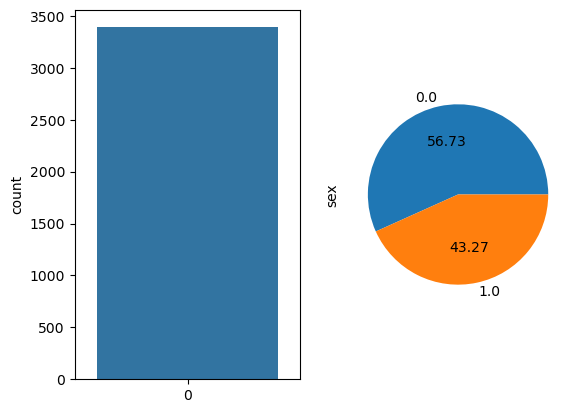

In [106]:
# Chart - 1 
plt.subplot(1,2,1)
sns.countplot(df['sex'])

plt.subplot(1,2,2)
df['sex'].value_counts().plot(kind = 'pie',autopct='%.2f')

df['sex'].value_counts()

0.0    1703
1.0    1687
Name: is_smoking, dtype: int64

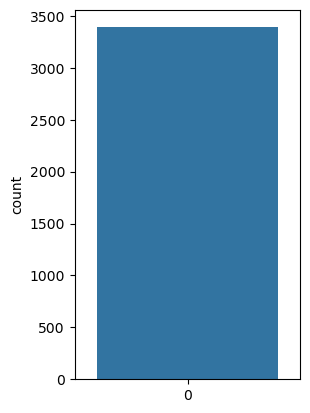

In [107]:
# Chart - 2 visualization code
plt.subplot(1,2,1)
sns.countplot(df['is_smoking'])

df['is_smoking'].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

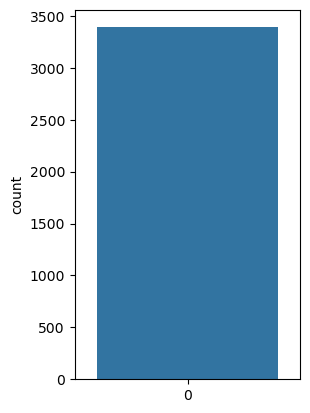

In [25]:
# Chart - 3 visualization code
plt.subplot(1,2,1)
sns.countplot(df['BPMeds'])

df['BPMeds'].value_counts()

0    3368
1      22
Name: prevalentStroke, dtype: int64

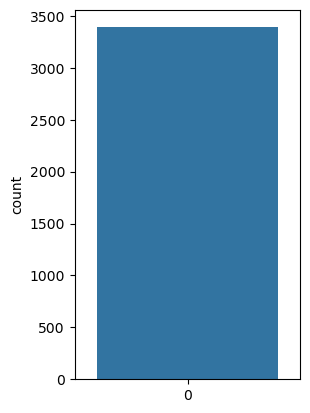

In [26]:
# Chart - 4 visualization code
plt.subplot(1,2,1)
sns.countplot(df['prevalentStroke'])

df['prevalentStroke'].value_counts()

0    2321
1    1069
Name: prevalentHyp, dtype: int64

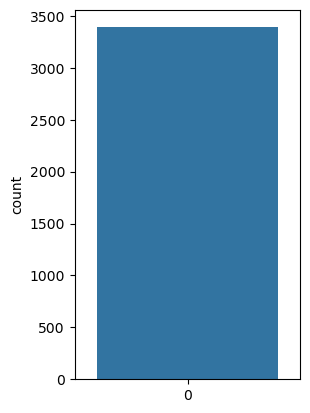

In [27]:
# Chart - 5 visualization code
plt.subplot(1,2,1)
sns.countplot(df['prevalentHyp'])

df['prevalentHyp'].value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

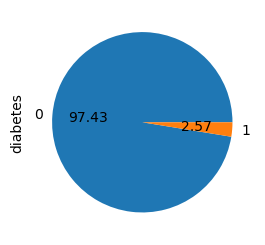

In [28]:
# Chart - 6 visualization code
plt.subplot(1,2,1)
df['diabetes'].value_counts().plot(kind = 'pie',autopct='%.2f')

df['diabetes'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

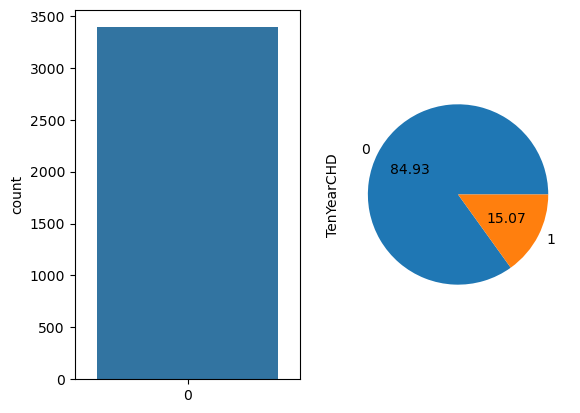

In [29]:
# Chart - 7 visualization code
plt.subplot(1,2,1)
sns.countplot(df['TenYearCHD'])

plt.subplot(1,2,2)
df['TenYearCHD'].value_counts().plot(kind = 'pie',autopct='%.2f')

df['TenYearCHD'].value_counts()

<Axes: ylabel='count'>

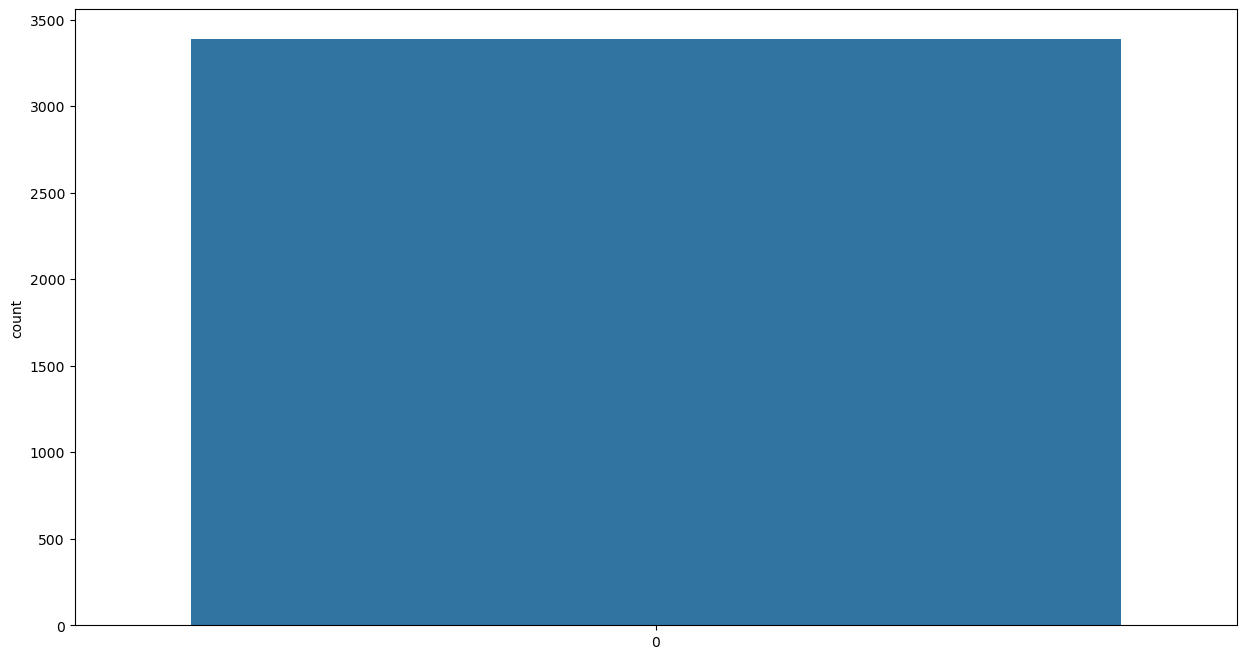

In [30]:
# Chart - 8 visualization code
plt.figure(figsize=(15,8))
sns.countplot(df['age'])

<Axes: ylabel='count'>

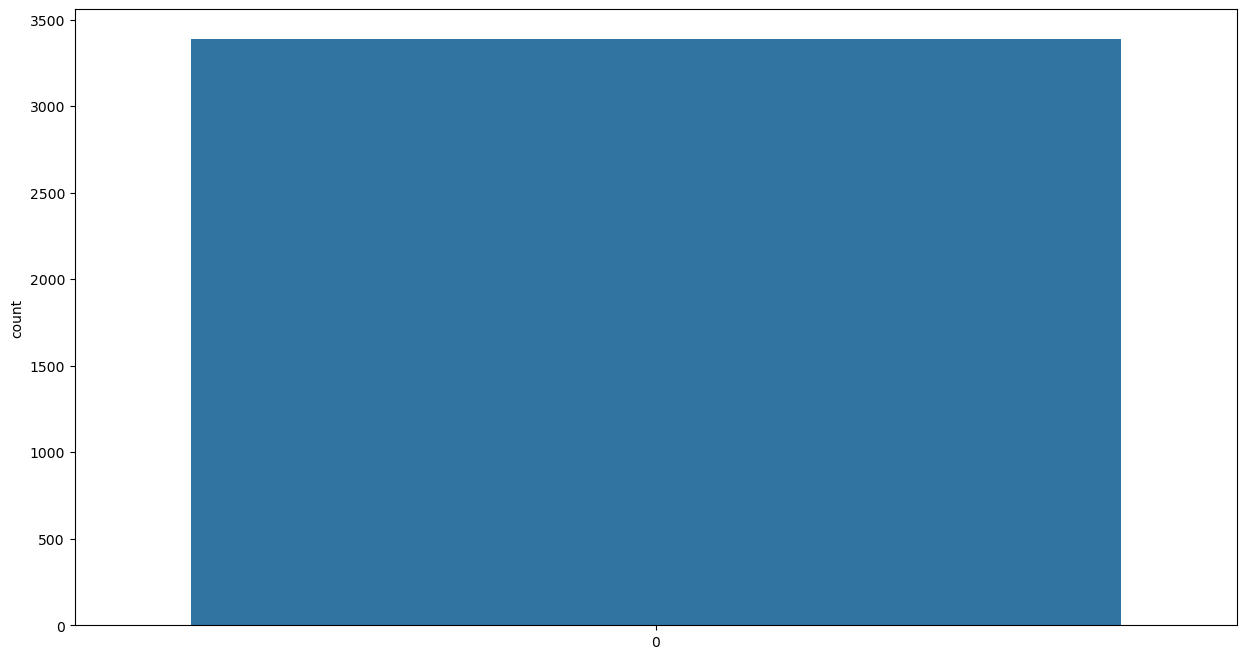

In [31]:
# Chart - 9 visualization code
plt.figure(figsize=(15,8))
sns.countplot(df['cigsPerDay'])

/tmp/wsuser/ipykernel_208/2357072170.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['totChol'])


<Axes: xlabel='totChol', ylabel='Density'>

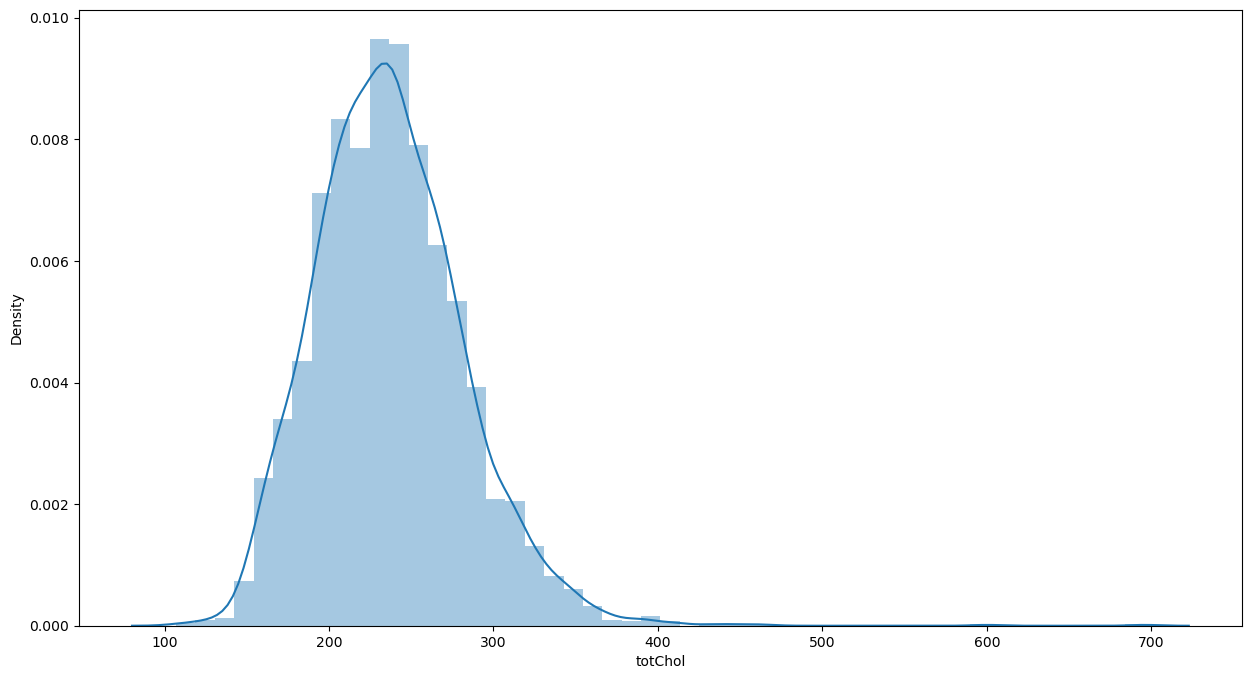

In [32]:
# Chart - 10 visualization code .
plt.figure(figsize=(15,8))
sns.distplot(df['totChol'])

/tmp/wsuser/ipykernel_208/1955610008.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sysBP'])


<Axes: xlabel='sysBP', ylabel='Density'>

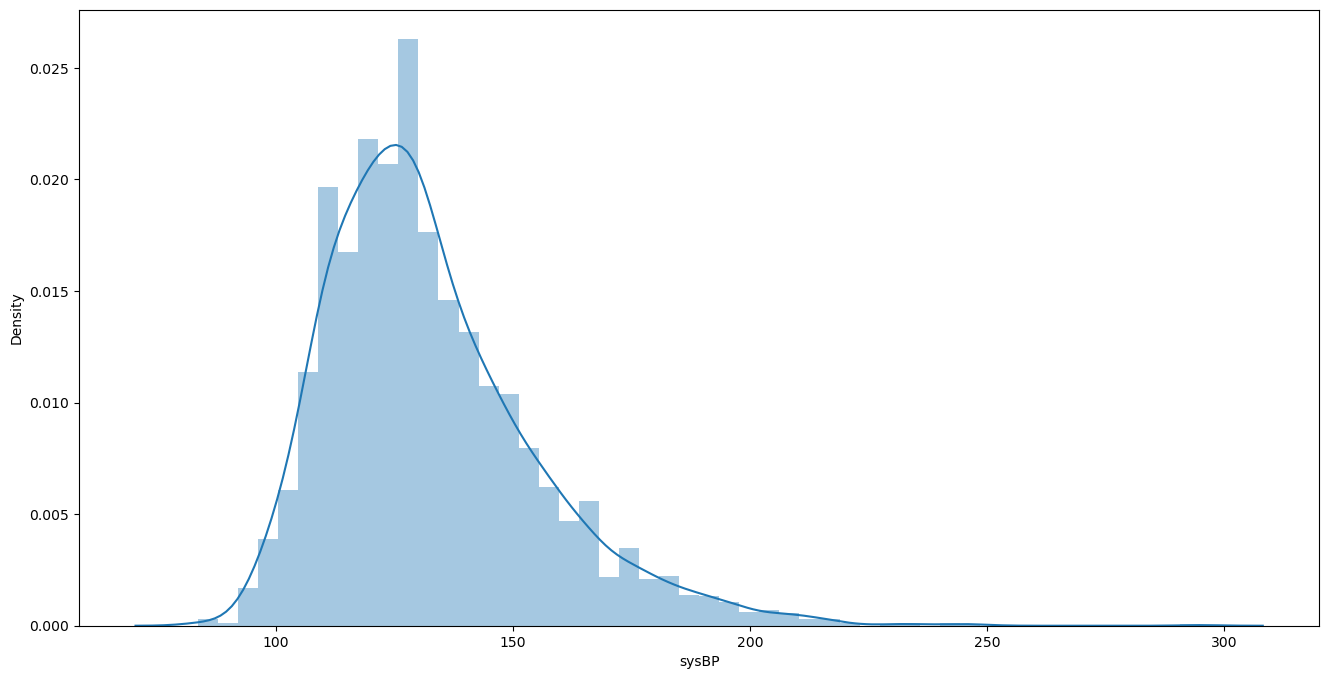

In [33]:
# Chart - 11 visualization code
plt.figure(figsize=(16,8))
sns.distplot(df['sysBP'])

<Axes: >

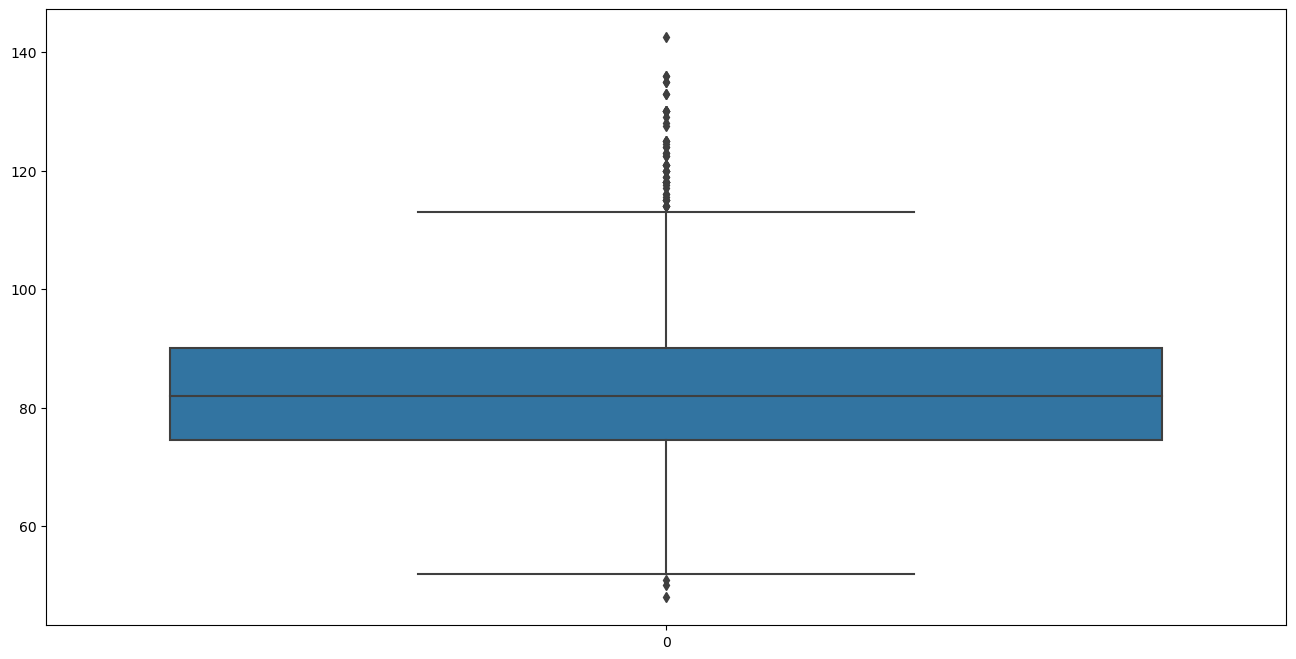

In [34]:
# Chart - 12 visualization code
plt.figure(figsize=(16,8))
sns.boxplot(df['diaBP'])

(array([1.670e+02, 1.067e+03, 1.337e+03, 5.920e+02, 1.500e+02, 4.500e+01,
        1.200e+01, 4.000e+00, 1.000e+00, 1.000e+00]),
 array([15.96 , 20.044, 24.128, 28.212, 32.296, 36.38 , 40.464, 44.548,
        48.632, 52.716, 56.8  ]),
 <BarContainer object of 10 artists>)

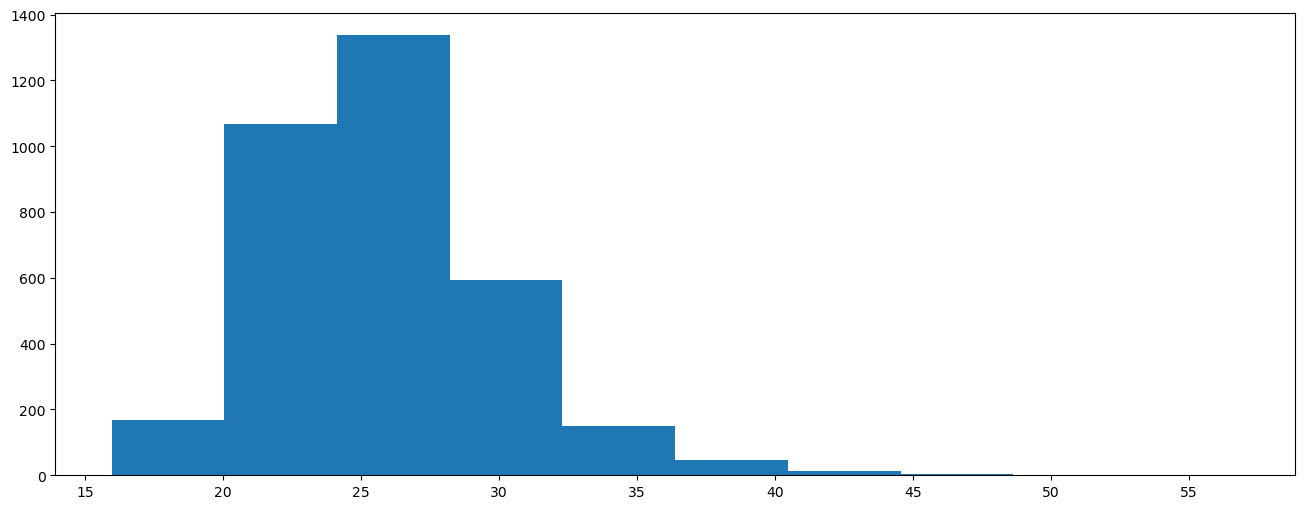

In [35]:
# Chart - 13 visualization code
plt.figure(figsize=(16,6)) 

x = df['BMI']
plt.hist(x)

Total number of people who have good HeartRate (2404, 17)


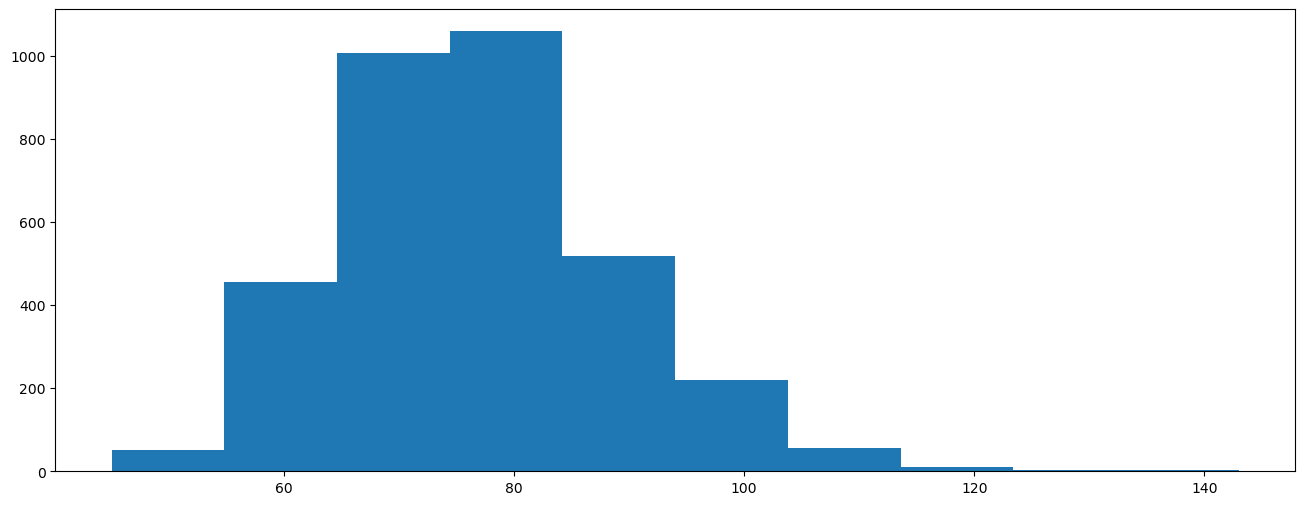

In [36]:
# Chart - 14 visualization code
plt.figure(figsize=(16,6)) 

x = df['heartRate']
plt.hist(x)

heart_df = df.loc[(df['heartRate']>=70) & (df['heartRate']<= 133)]
print(f'Total number of people who have good HeartRate {heart_df.shape}')

<Axes: xlabel='age', ylabel='cigsPerDay'>

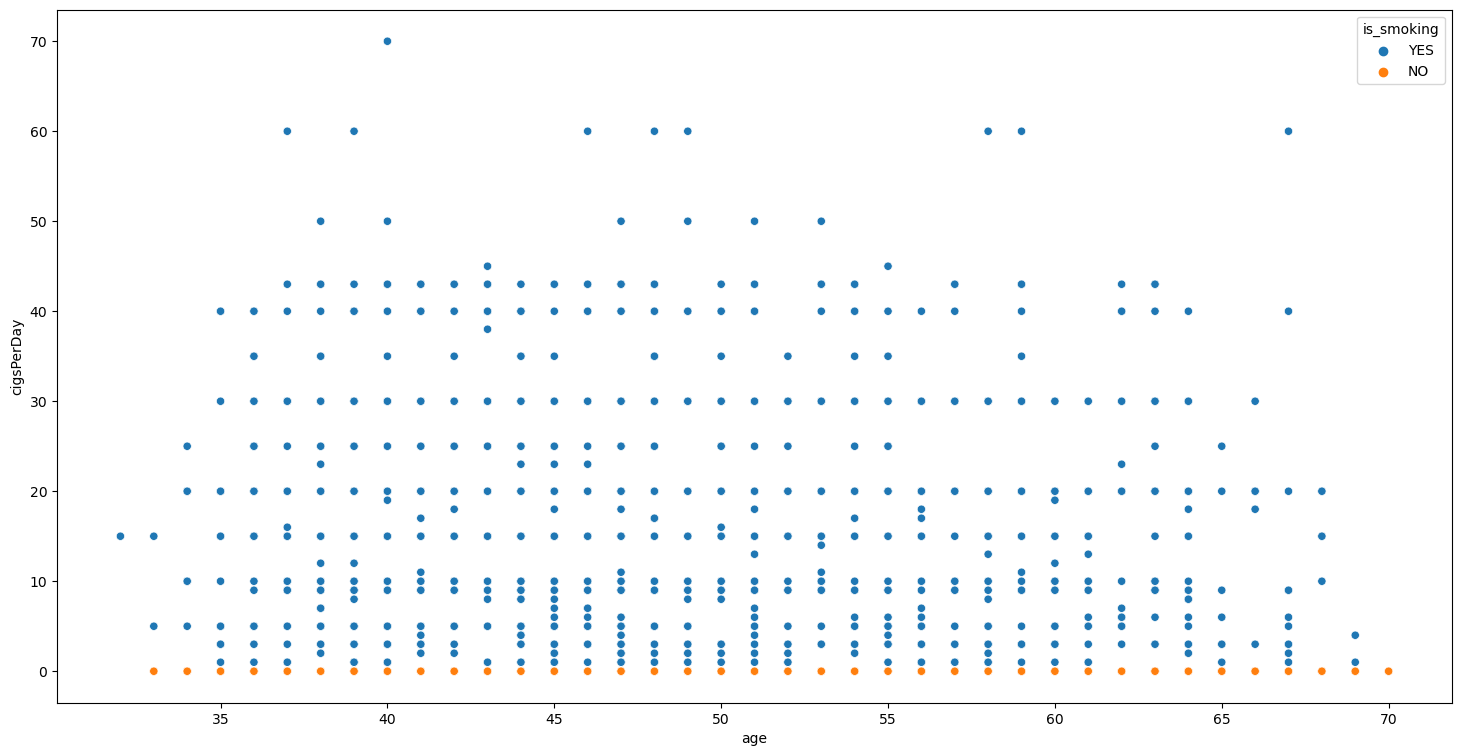

In [37]:
# Chart - 15 visualization code
plt.figure(figsize=(18,9)) 
#sns.scatterplot(df['age'], df['cigsPerDay'], hue=df['sex'], style=df['is_smoking']) 
sns.scatterplot(x=df['age'],y=df['cigsPerDay'],hue=df['is_smoking'])

<Axes: xlabel='sex', ylabel='age'>

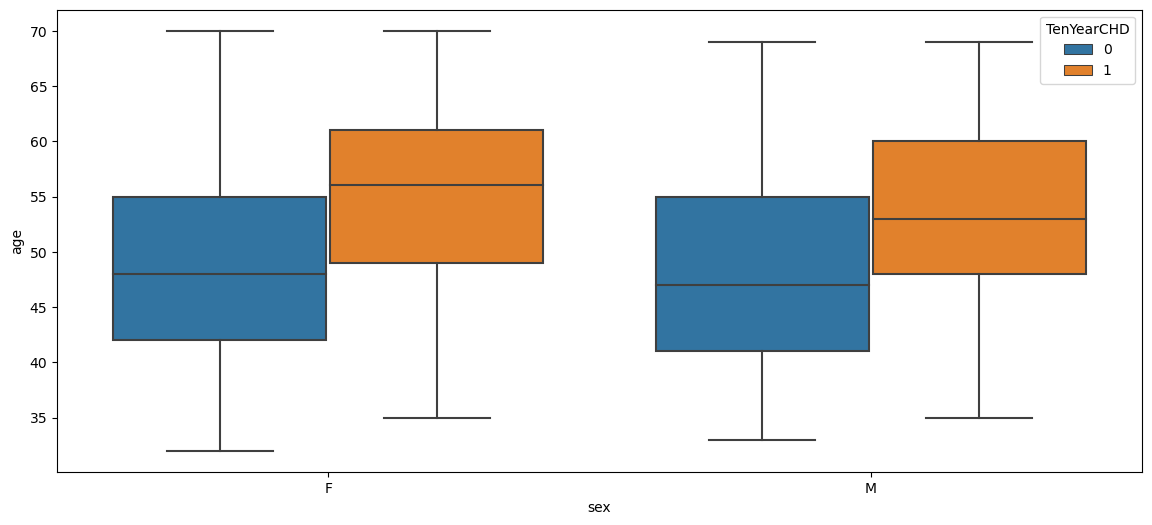

In [38]:
# Chart - 16 visualization code
plt.figure(figsize=(14,6)) 
sns.boxplot(x=df['sex'], y=df['age'], hue=df['TenYearCHD']) 

<Axes: xlabel='age', ylabel='BMI'>

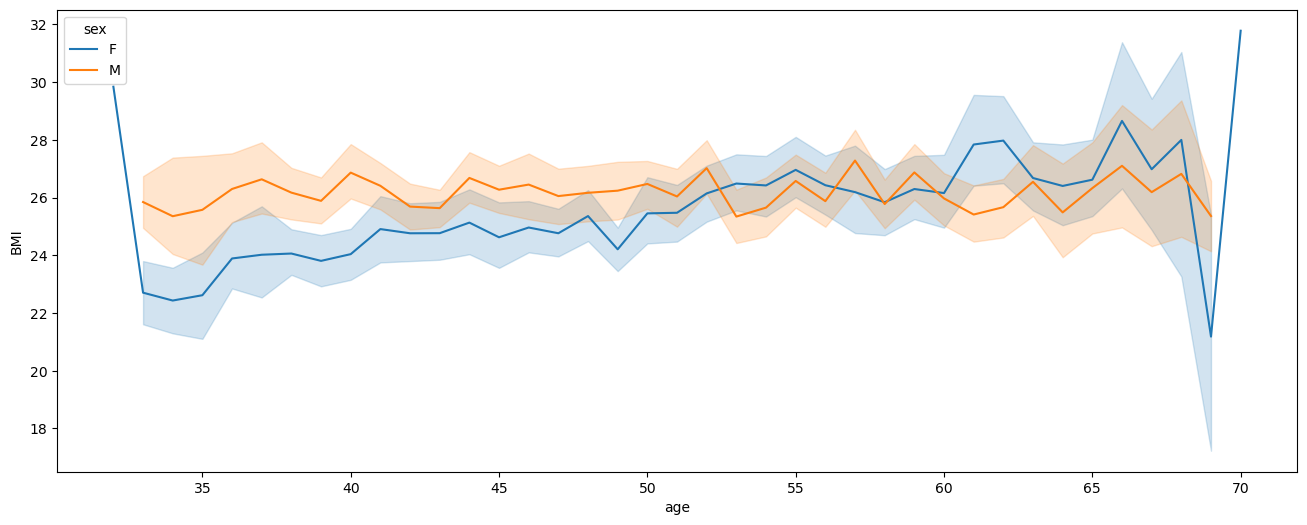

In [39]:
# Chart - 17 visualization code
plt.figure(figsize=(16,6))
# Show the plot
sns.lineplot(x=df['age'], y=df['BMI'], hue=df['sex'])

<Axes: xlabel='age', ylabel='totChol'>

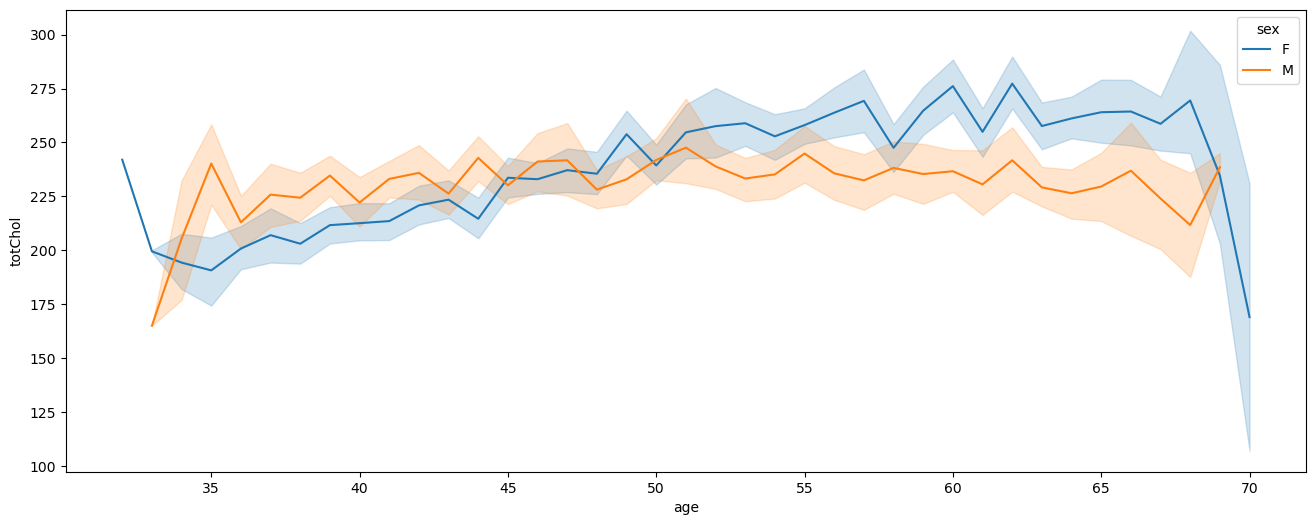

In [40]:
# Chart - 18 visualization code
plt.figure(figsize=(16,6))
# Show the plot
sns.lineplot(x=df['age'], y=df['totChol'], hue=df['sex'])

<Axes: xlabel='age', ylabel='glucose'>

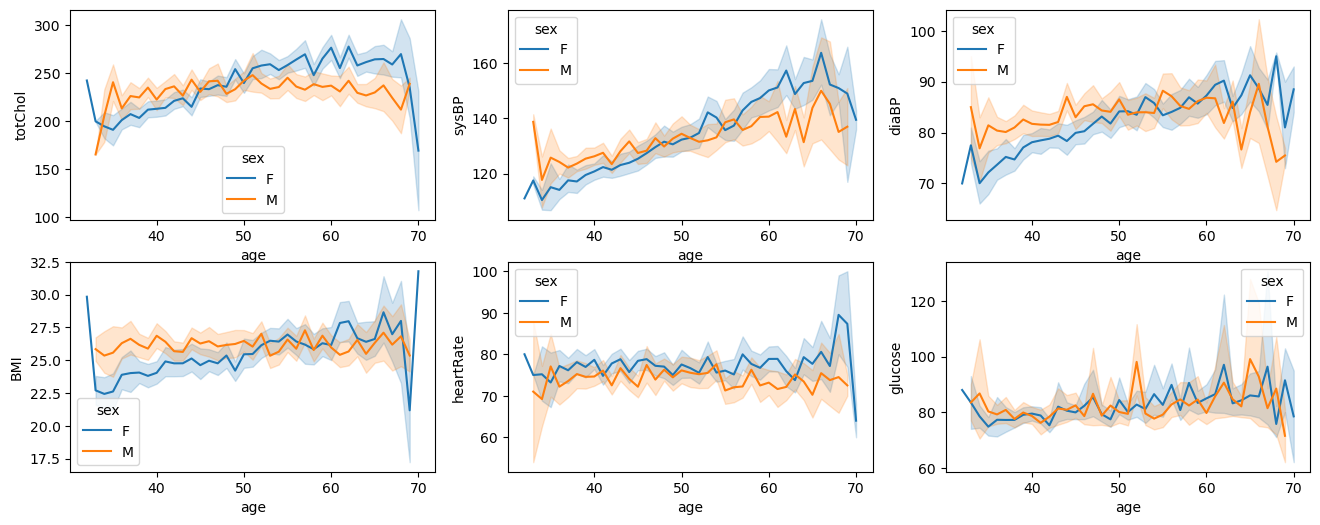

In [41]:
plt.figure(figsize=(16,6))
plt.subplot(2,3,1)
sns.lineplot(x=df['age'], y=df['totChol'], hue=df['sex'])

plt.subplot(2,3,2)
sns.lineplot(x=df['age'], y=df['sysBP'], hue=df['sex'])

plt.subplot(2,3,3)
sns.lineplot(x=df['age'], y=df['diaBP'], hue=df['sex'])

plt.subplot(2,3,4)
sns.lineplot(x=df['age'], y=df['BMI'], hue=df['sex'])

plt.subplot(2,3,5)
sns.lineplot(x=df['age'], y=df['heartRate'], hue=df['sex'])

plt.subplot(2,3,6)
sns.lineplot(x=df['age'], y=df['glucose'], hue=df['sex'])

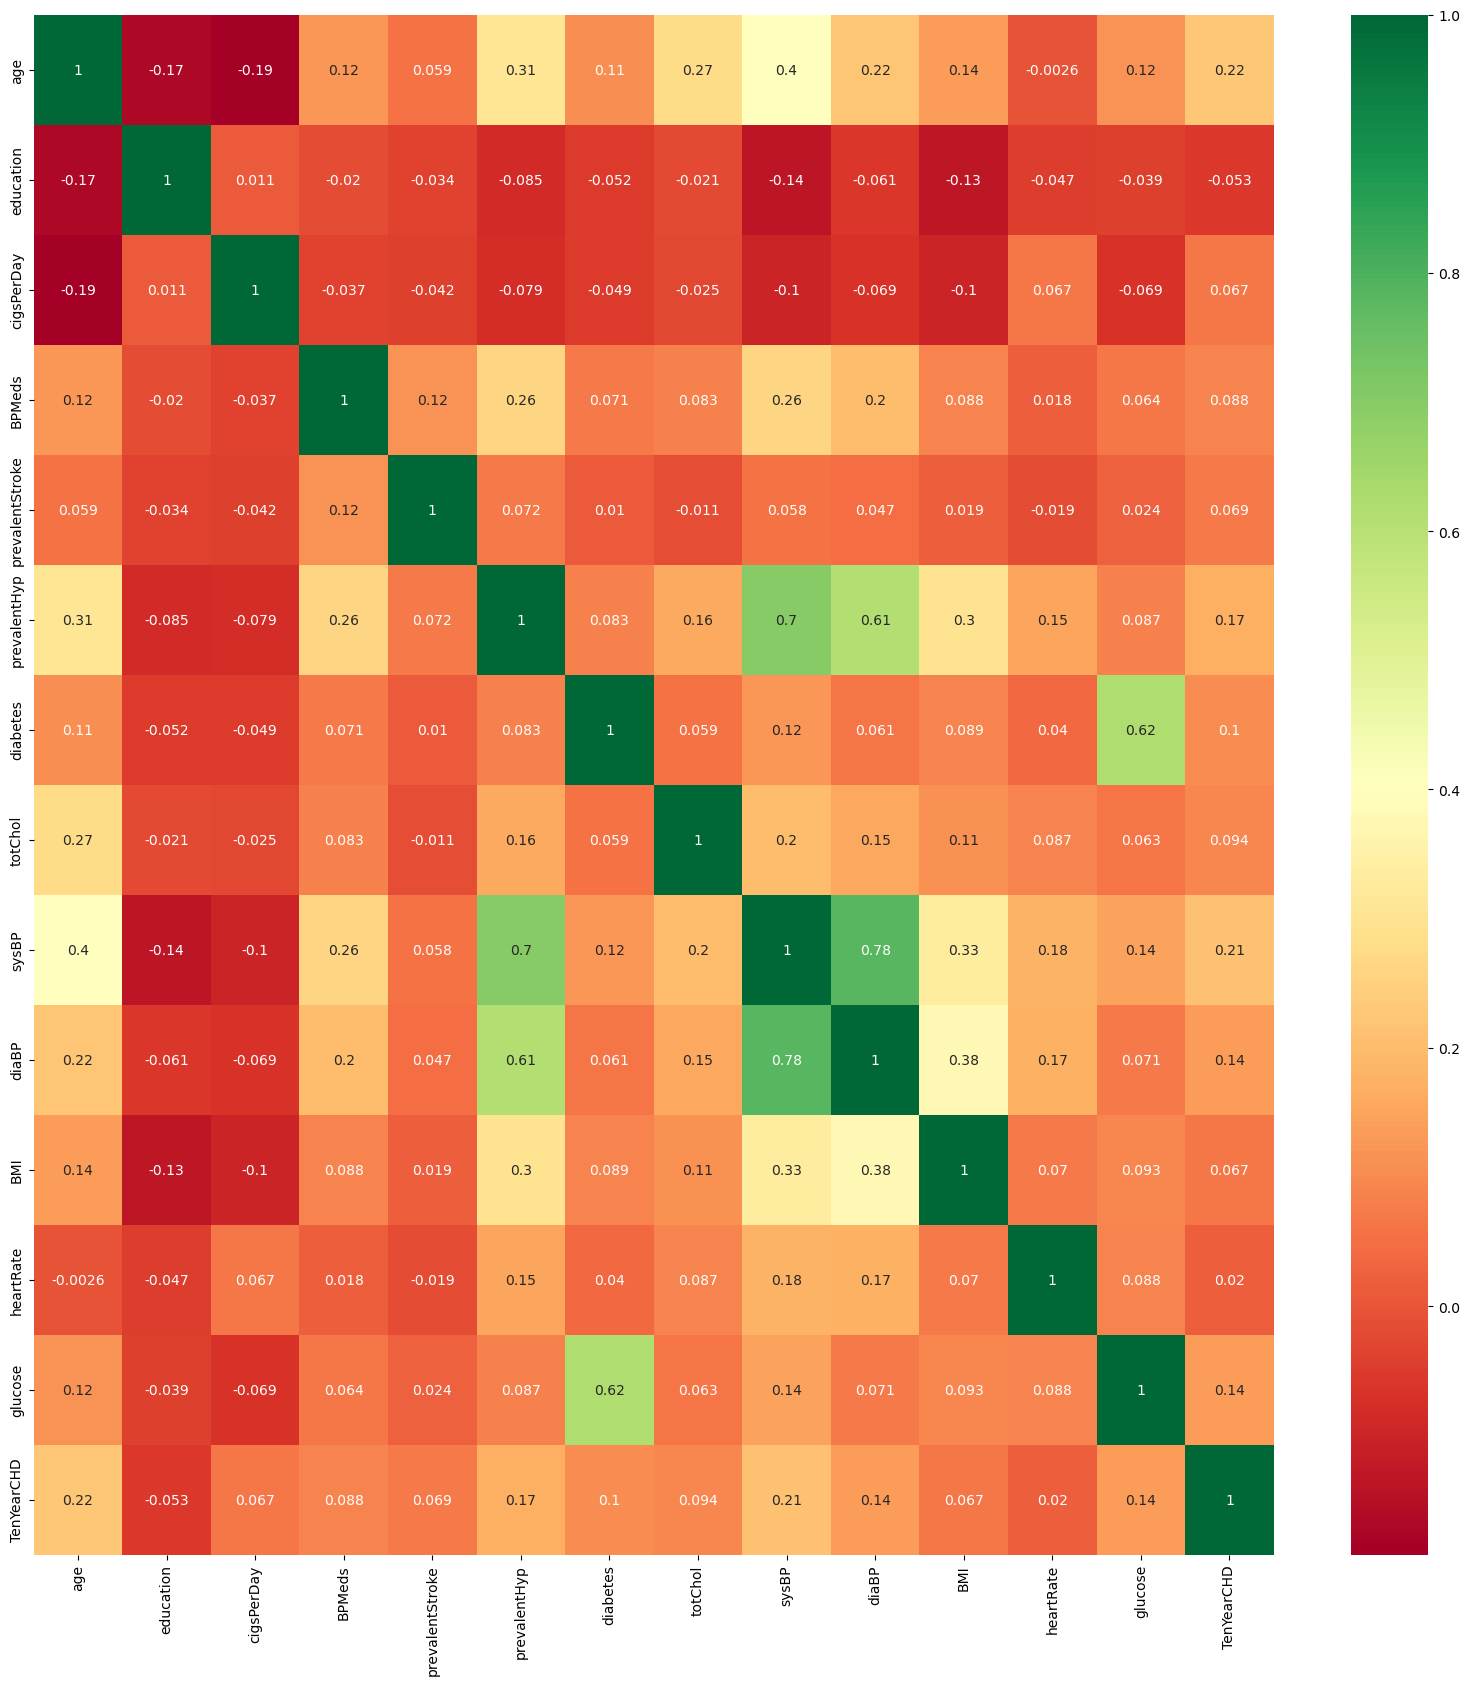

In [42]:
# Correlation Heatmap visualization code
h = df.drop(['id', 'sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes'], axis=1)

h = df.drop(['id','sex','is_smoking'], axis=1)
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = h.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(h[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [43]:
# Defining 3 lists containing the column names of 
# a. dependent variables
# b. continuous independent variables
# c. categorical independent variables
# This is defined based on the number of unique values for each attribute.

dependent_var = ['TenYearCHD']
continuous_var = ['age','cigsPerDay','totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_var = ['education', 'sex', 'is_smoking','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']

In [44]:
# Encode your categorical columns
# Encoding into binary columns

df['sex'] = np.where(df['sex'] == 'M',1,0)
df['is_smoking'] = np.where(df['is_smoking'] == 'YES',1,0)

In [45]:
# Handling Missing Values & Missing Value Imputation
print(f" Total missing values {df.isna().sum().sum()}")
df.isna().sum()

 Total missing values 510


id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [46]:
# Replacing the missing values in the categorical columns with its mode (most repeated value).
df.drop(['id'], axis=1,inplace=True)
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])

In [47]:
# education distribution after mode imputation
df.education.value_counts()

1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [48]:
# bp_meds distribution after mode imputation
df.BPMeds.value_counts()

0.0    3290
1.0     100
Name: BPMeds, dtype: int64

In [49]:
# Mean and median number of cigarettes per day
df.cigsPerDay.mean().round(0),df.cigsPerDay.median()

(9.0, 0.0)

In [50]:
# All missing values in the cigs_per_day column
df[df['cigsPerDay'].isna()] 

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,55,1.0,0,1,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,45,3.0,1,1,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,42,1.0,1,1,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,61,1.0,0,1,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,41,1.0,0,1,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,54,1.0,1,1,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,47,2.0,0,1,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,49,1.0,0,1,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,57,1.0,0,1,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,49,2.0,0,1,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


In [51]:
# mean and median number of cigarettes per day for a smoker (excluding non-smokers)
df[df['is_smoking']==1]['cigsPerDay'].mean(),df[df['is_smoking']==1]['cigsPerDay'].median()


(18.345945945945946, 20.0)

/tmp/wsuser/ipykernel_208/3320518072.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_smoking']==1]['cigsPerDay'])


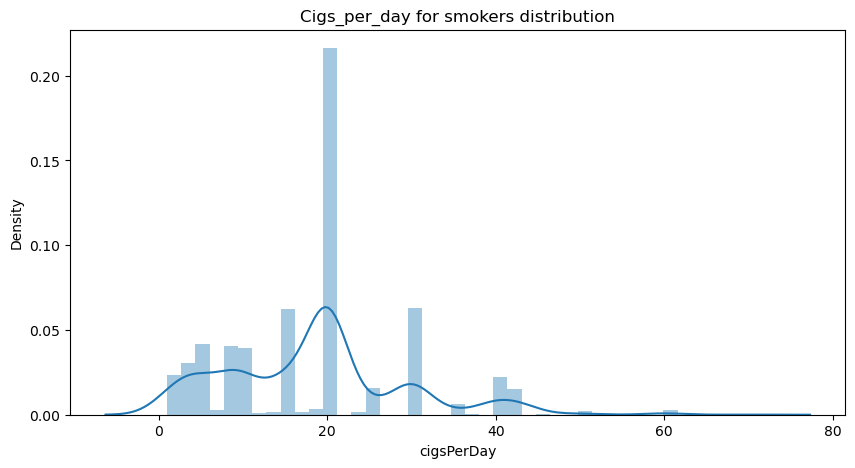

In [52]:
# distribution of number of cigarettes per day for smokers (excluding non-smokers)
plt.figure(figsize=(10,5))
sns.distplot(df[df['is_smoking']==1]['cigsPerDay'])
plt.title('Cigs_per_day for smokers distribution')
plt.show()
     

<Axes: >

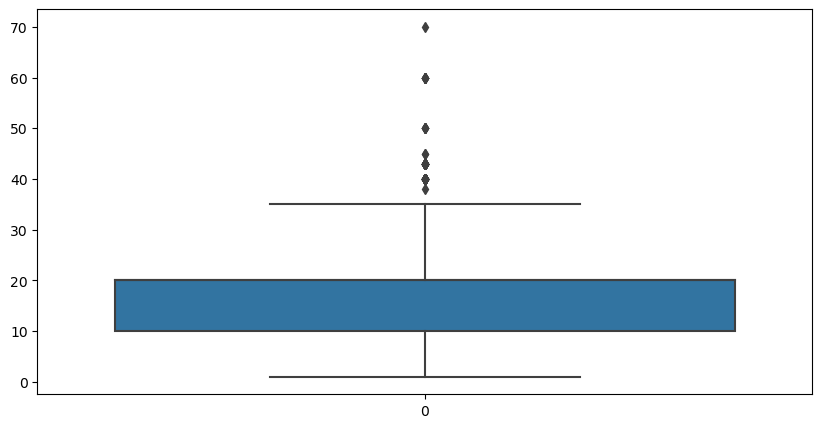

In [53]:
# box plot for the number of cigarettes per day for smokers (excluding non-smokers)
plt.figure(figsize=(10,5))
sns.boxplot(df[df['is_smoking']==1]['cigsPerDay'])

In [54]:
# Imputing the missing values in the cigs_per_day 
df['cigsPerDay'] = df['cigsPerDay'].fillna(df[df['is_smoking']==1]['cigsPerDay'].median())

In [55]:
# Checking for any wrong entries where the patient is not a smoker and cigarettes per day above 0

df[(df['is_smoking']==0) & (df['cigsPerDay']>0)]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [56]:

# Checking for any wrong entries where the patient is a smoker
# and cigarettes per day is 0

df[(df['is_smoking']==1) & (df['cigsPerDay']==0)]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


/tmp/wsuser/ipykernel_208/3004603057.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


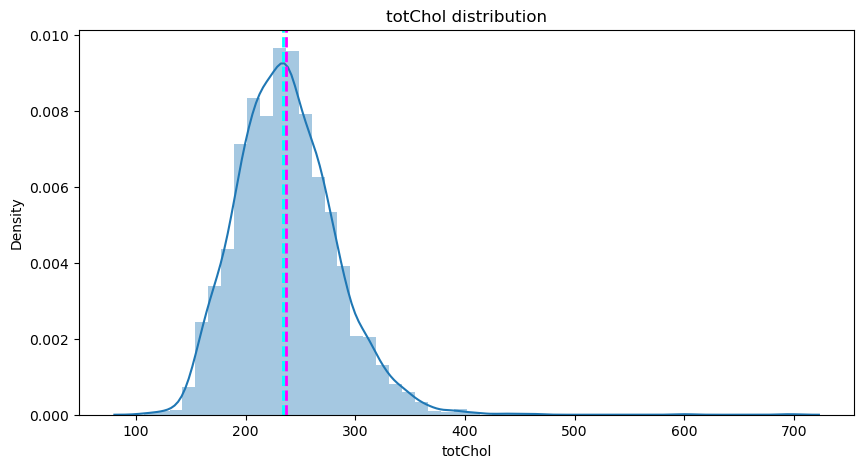

/tmp/wsuser/ipykernel_208/3004603057.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


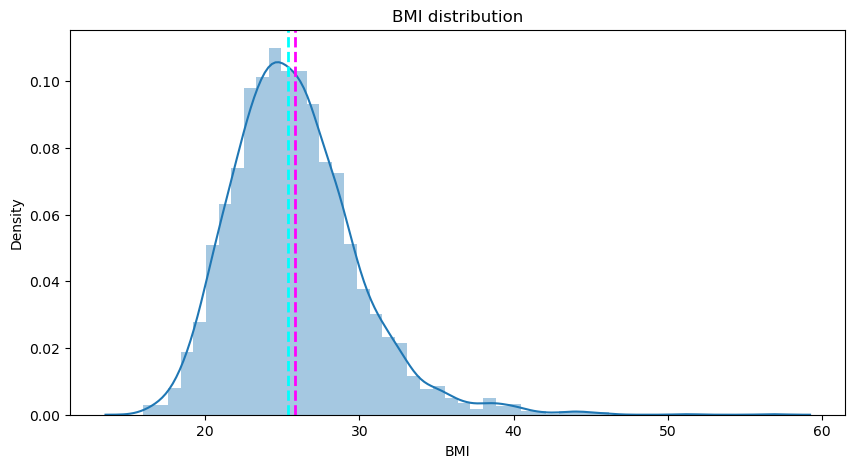

/tmp/wsuser/ipykernel_208/3004603057.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


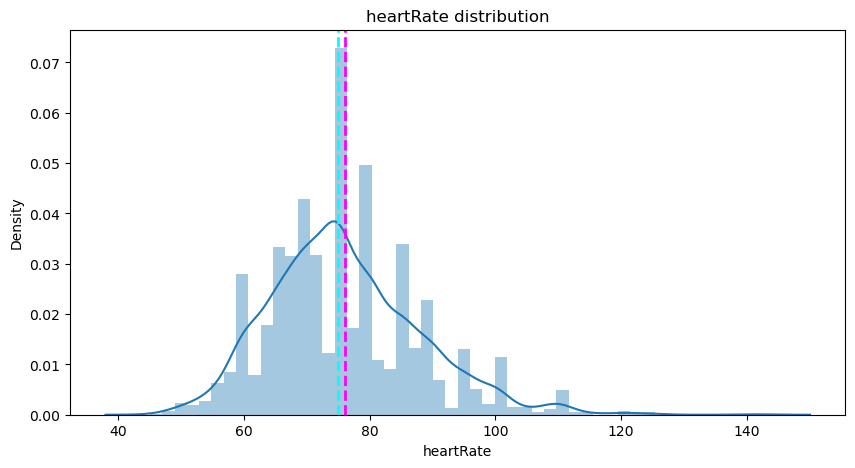

In [57]:
# Checking the distribution of the total_cholesterol, bmi, and heart_rate
for i in ['totChol','BMI','heartRate']:
  plt.figure(figsize=(10,5))
  sns.distplot(df[i])
  plt.axvline(df[i].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[i].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(i+' distribution')
  plt.show()


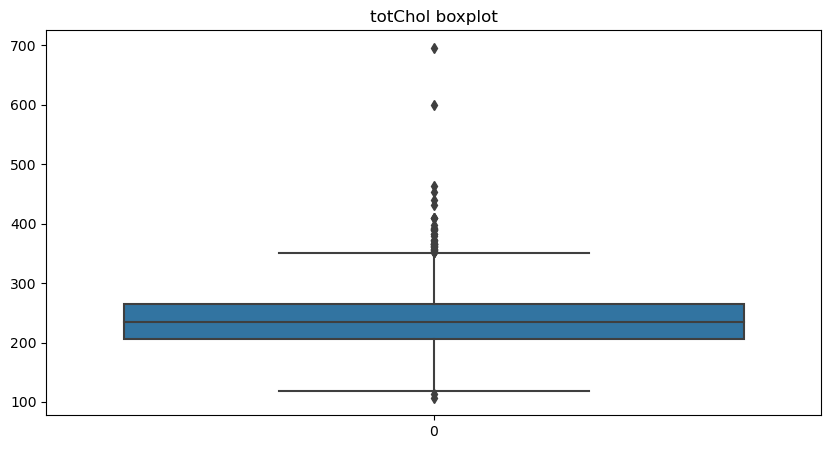

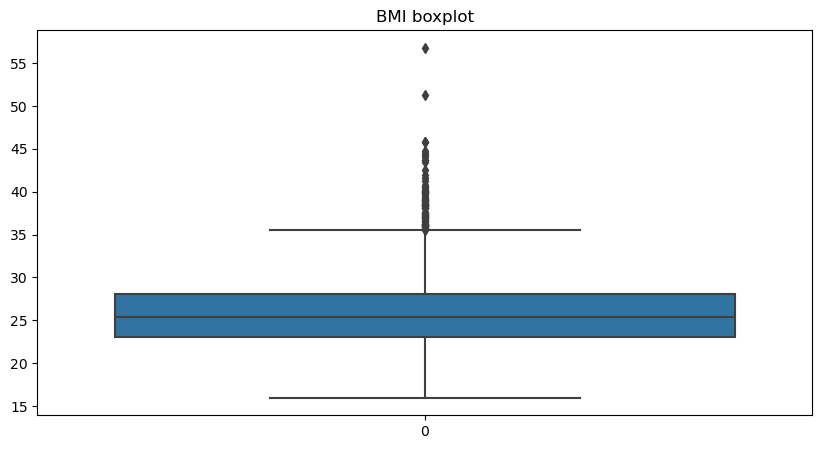

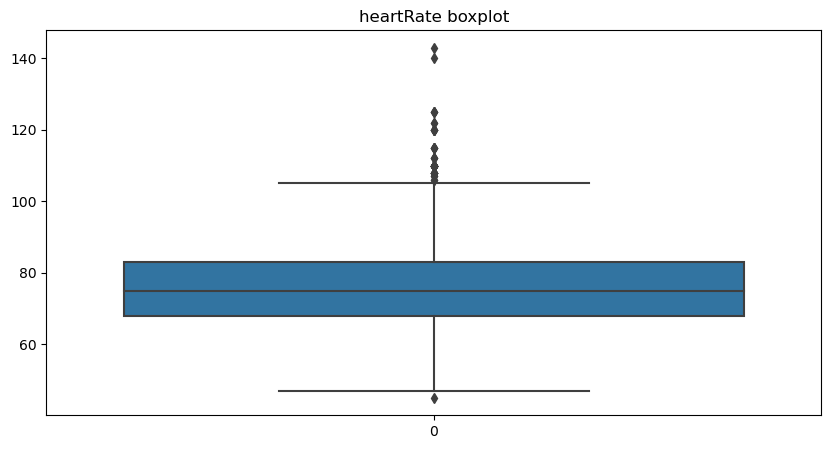

In [58]:
# Checking outliers in total_cholesterol, bmi, heart_rate columns
for i in ['totChol','BMI','heartRate']:
  plt.figure(figsize=(10,5))
  sns.boxplot(df[i])
  plt.title(i+' boxplot')
  plt.show()

In [59]:

# Mean and median for total_cholesterol
df.totChol.mean(),df.totChol.median()

(237.07428400954655, 234.0)

In [60]:
# Mean and median for BMI
df.BMI.mean(),df.BMI.median()

(25.7949644549763, 25.38)

In [61]:
# Mean and median for heart_rate
df.heartRate.mean(),df.heartRate.median()

(75.97727943346119, 75.0)

In [62]:
# Imputing missing values in the total_cholesterol, bmi, and heart_rate with their medain values
df['totChol']   = df['totChol'].fillna(df['totChol'].median())
df['BMI']       = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

In [63]:
# mean and median of totChol after median imputation
df.totChol.mean(),df.totChol.median()

(237.03982300884957, 234.0)

In [64]:
# mean and median of BMI after median imputation
df.BMI.mean(),df.BMI.median()
    

(25.793250737463126, 25.38)

In [65]:
# mean and median of heartRate after median imputation
df.heartRate.mean(),df.heartRate.median()

(75.97699115044247, 75.0)

In [66]:
# total missing values in glucose
df.glucose.isna().sum()

304

/tmp/wsuser/ipykernel_208/3639847148.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['glucose'])


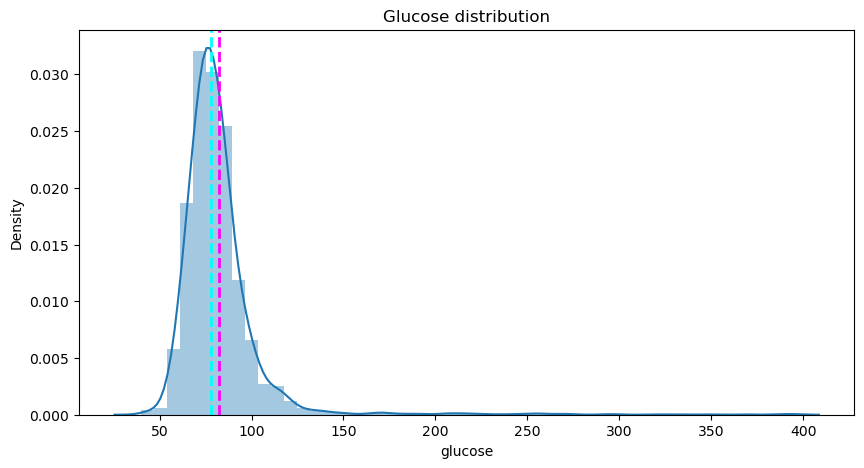

In [67]:
# distribution of glucose
plt.figure(figsize=(10,5))
sns.distplot(df['glucose'])
plt.axvline(df['glucose'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df['glucose'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Glucose distribution')
plt.show()

Text(0.5, 1.0, 'Glucose boxplot')

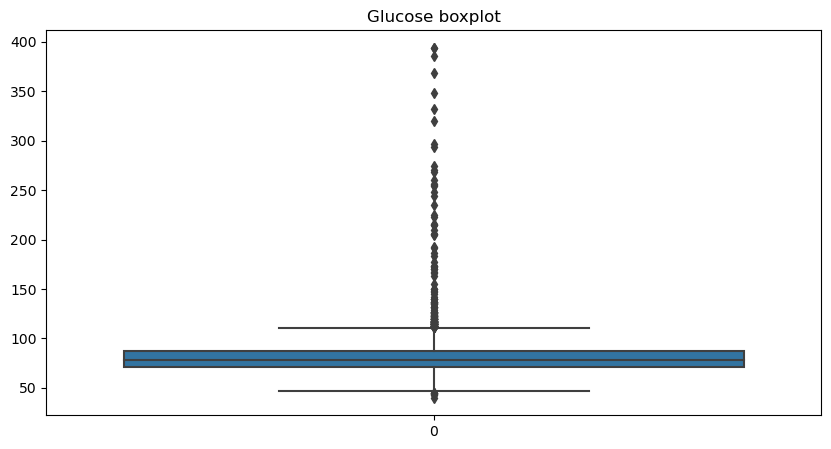

In [68]:
# Outliers in glucose
plt.figure(figsize=(10,5))
sns.boxplot(df['glucose'])
plt.title('Glucose boxplot') 

In [69]:
# Mean, median, and mode for glucose 
df.glucose.mean(),df.glucose.median(),df.glucose.mode() 

(82.08651976668827,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

In [70]:
# Using KNN imputer with K=10
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(df)
df = pd.DataFrame(imputed, columns=df.columns)

In [71]:
# checking for missing values
df.isna().sum(), print(f" Total number of rows and columns are =",{df.shape})

 Total number of rows and columns are = {(3390, 16)}


(age                0
 education          0
 sex                0
 is_smoking         0
 cigsPerDay         0
 BPMeds             0
 prevalentStroke    0
 prevalentHyp       0
 diabetes           0
 totChol            0
 sysBP              0
 diaBP              0
 BMI                0
 heartRate          0
 glucose            0
 TenYearCHD         0
 dtype: int64,
 None)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   float64
 1   education        3390 non-null   float64
 2   sex              3390 non-null   float64
 3   is_smoking       3390 non-null   float64
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   float64
 7   prevalentHyp     3390 non-null   float64
 8   diabetes         3390 non-null   float64
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   float64
dtypes: float64(16)
memory usage: 423.9 KB


In [73]:
# changing datatypes
df = df.astype({'age': int, 'education':int,'sex':int,'is_smoking':int,'cigsPerDay':int,
               'BPMeds':int,'prevalentStroke':int,'prevalentHyp':int,'diabetes':int,
               'totChol':float,'sysBP':float,'diaBP':float,
               'BMI':float,'heartRate':float,'glucose':float,'TenYearCHD':int})

TenYearCHD
0             2879
1              511
dtype: int64

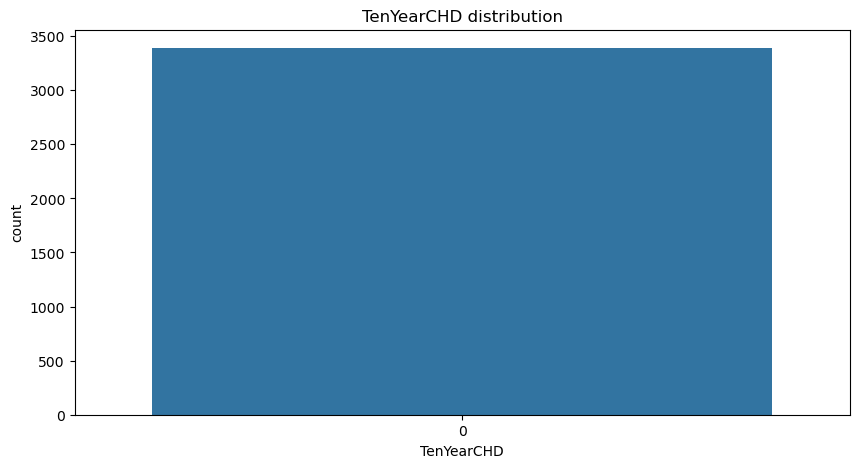

In [74]:
# Distribution of dependent varaible - ten_year_chd
plt.figure(figsize=(10,5))
sns.countplot(df[dependent_var[0]])
plt.xlabel(dependent_var[0])
plt.title(dependent_var[0]+' distribution')

# Distribution of TenYearCHD
df[dependent_var].value_counts()

In [75]:
# unbalanced distribution
511/(2879+511)

0.15073746312684366

In [76]:
# Creating a new column pulse_pressure and dropping sysBP and diaBP

df['pulse_pressure'] = df['sysBP']-df['diaBP']
df.drop('sysBP',axis=1,inplace=True)
df.drop('diaBP',axis=1,inplace=True)


In [77]:
# columns
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD', 'pulse_pressure'],
      dtype='object')

/tmp/wsuser/ipykernel_208/4139666501.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pulse_pressure'])


Text(0.5, 1.0, 'Pulse Pressure Distribution')

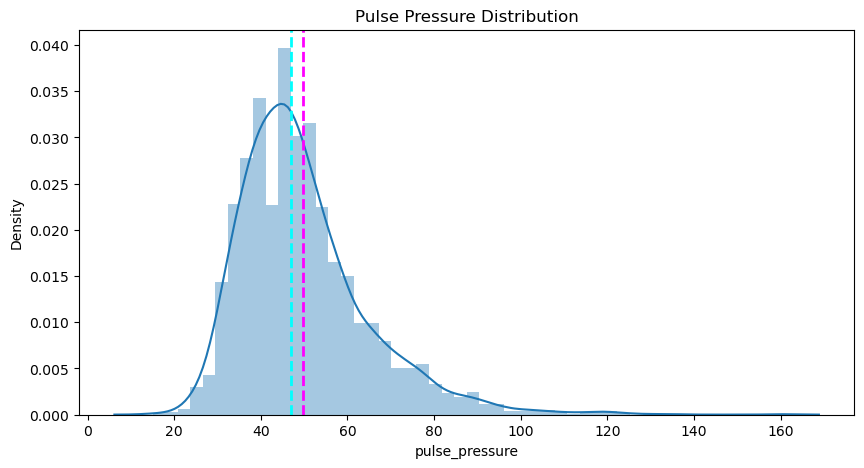

In [78]:
# Analyzing the distribution of pulse_pressure
plt.figure(figsize=(10,5))
sns.distplot(df['pulse_pressure'])
plt.axvline(df['pulse_pressure'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df['pulse_pressure'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Pulse Pressure Distribution')

     

<Figure size 1000x500 with 0 Axes>

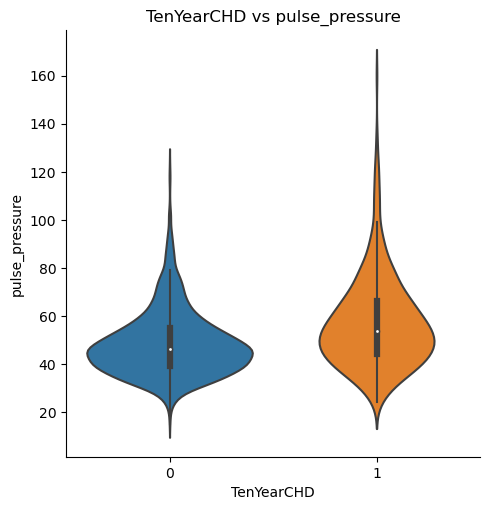

In [79]:
# Relationship between pulse pressure with the dependent variable
plt.figure(figsize=(10,5))
sns.catplot(x=dependent_var[0],y='pulse_pressure',data=df,kind='violin')
plt.title('TenYearCHD vs pulse_pressure')
plt.show()
     

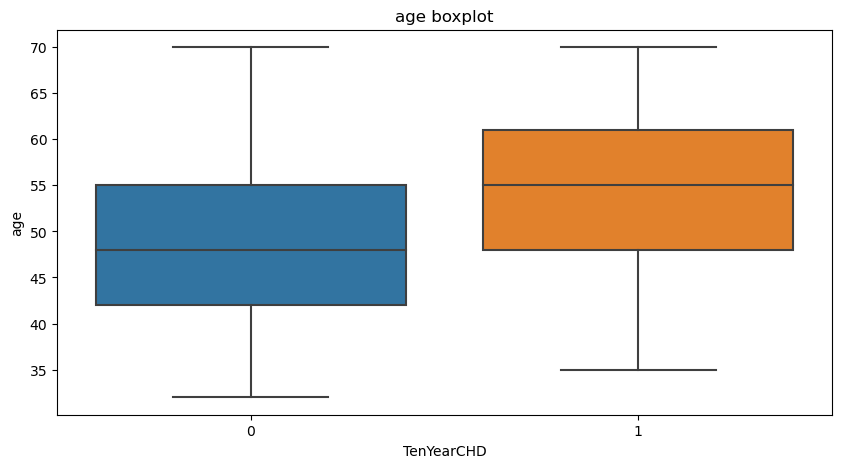

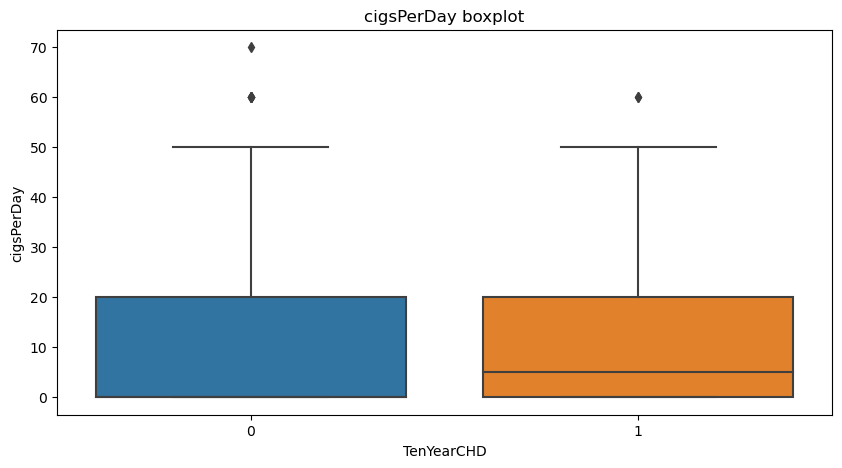

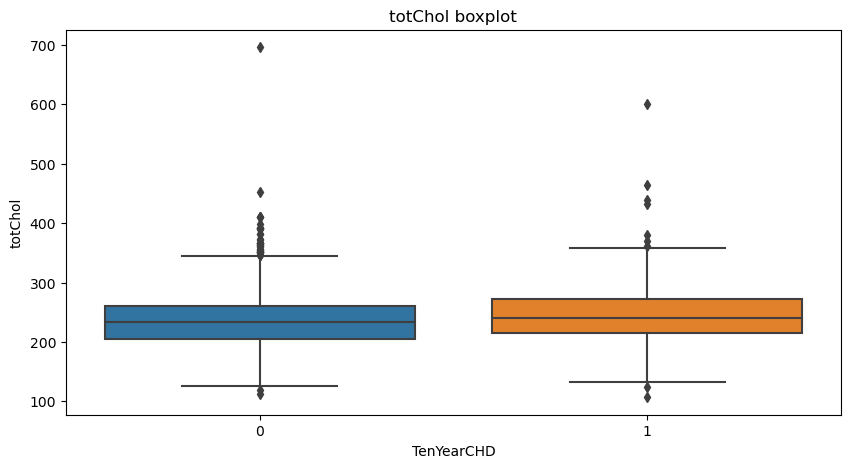

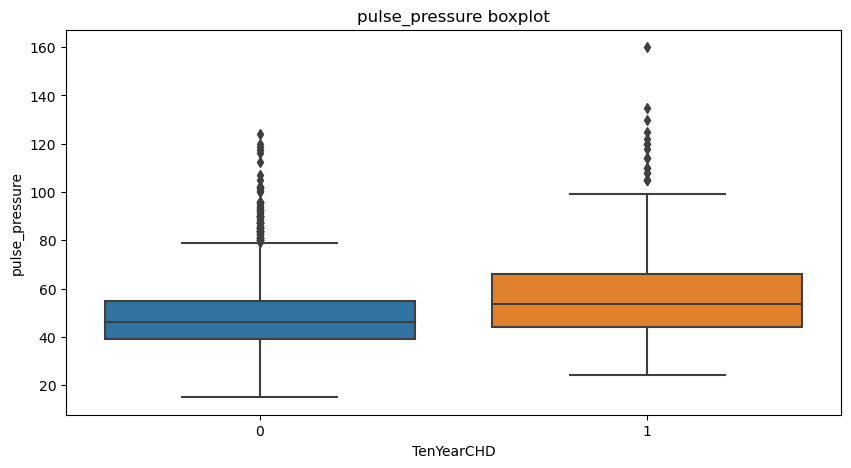

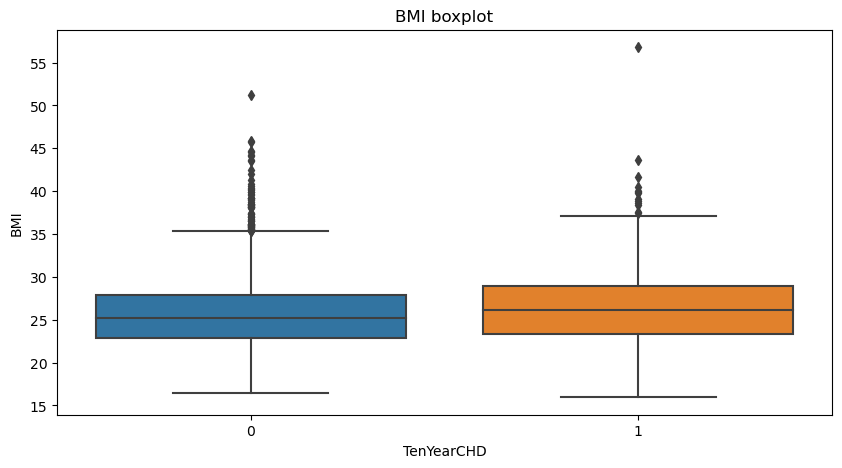

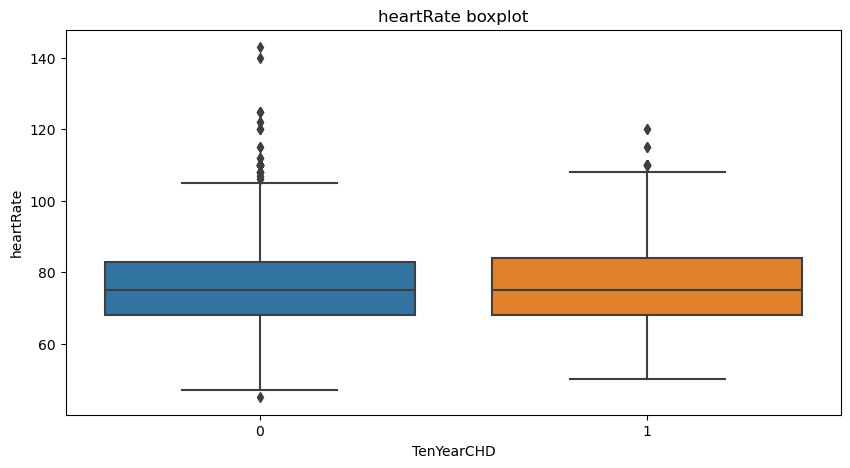

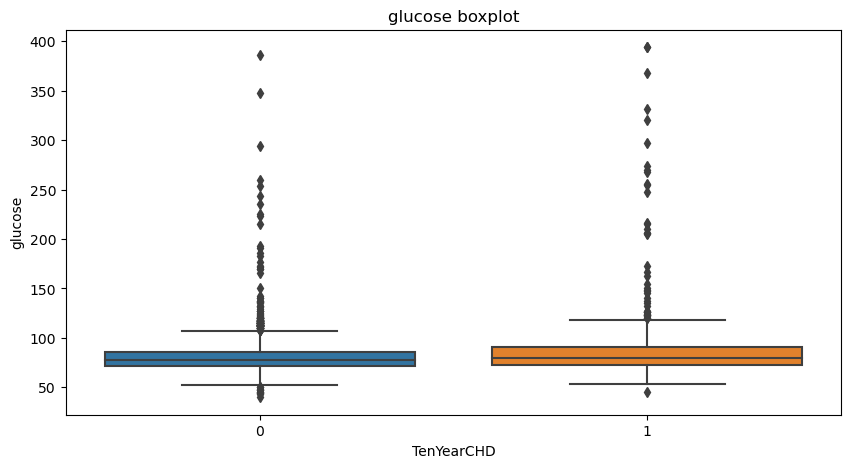

In [80]:
# checking for outliers in continuous features
continuous_var2 = ['age','cigsPerDay','totChol', 'pulse_pressure', 'BMI', 'heartRate', 'glucose']
for col in continuous_var2:
  plt.figure(figsize=(10,5))
  sns.boxplot(y = col,x = dependent_var[0],data=df) 
  plt.title(col+' boxplot')
  plt.show()
  

In [81]:
# Transform Your data
# skewness along the index axis
(df[continuous_var2]).skew(axis = 0)

age               0.225796
cigsPerDay        1.204077
totChol           0.948170
pulse_pressure    1.412382
BMI               1.025551
heartRate         0.676660
glucose           6.361911
dtype: float64

In [82]:
# Skew for log10 transformation
np.log10(df[continuous_var2]+1).skew(axis = 0)

age              -0.015053
cigsPerDay        0.275072
totChol           0.011860
pulse_pressure    0.354174
BMI               0.370422
heartRate         0.165898
glucose           2.310918
dtype: float64

In [83]:
# Checking skew after log transformation
df[continuous_var2].skew(axis = 0)


age               0.225796
cigsPerDay        1.204077
totChol           0.948170
pulse_pressure    1.412382
BMI               1.025551
heartRate         0.676660
glucose           6.361911
dtype: float64

/tmp/wsuser/ipykernel_208/2037354159.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


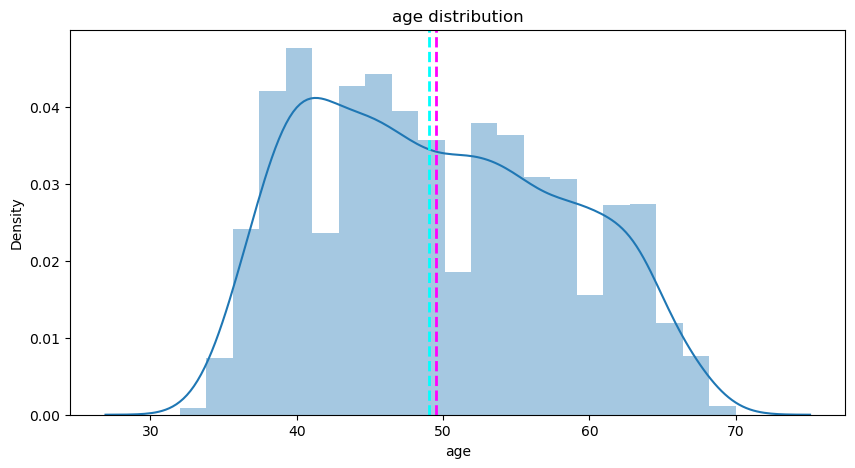

/tmp/wsuser/ipykernel_208/2037354159.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


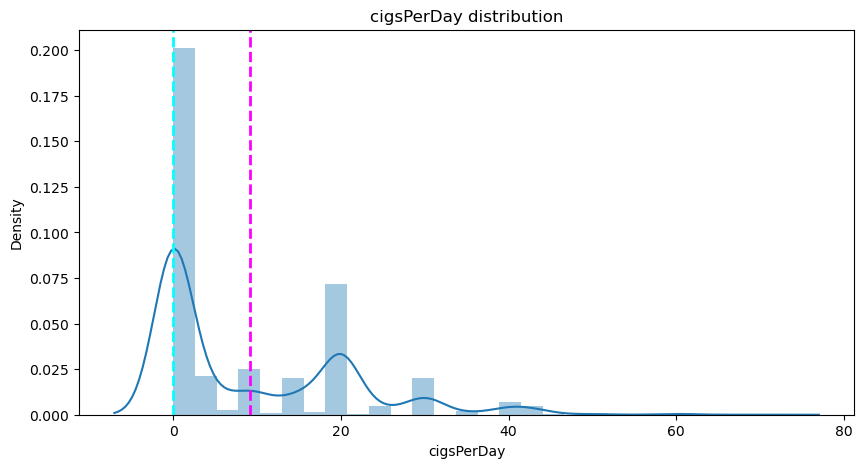

/tmp/wsuser/ipykernel_208/2037354159.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


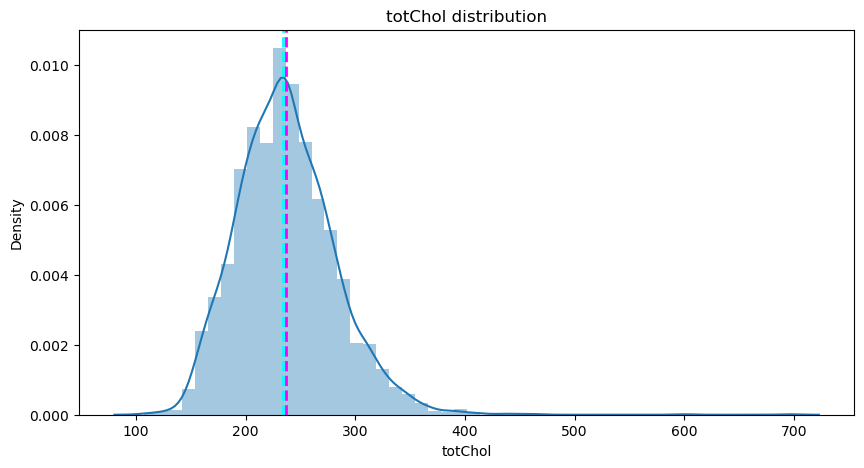

/tmp/wsuser/ipykernel_208/2037354159.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


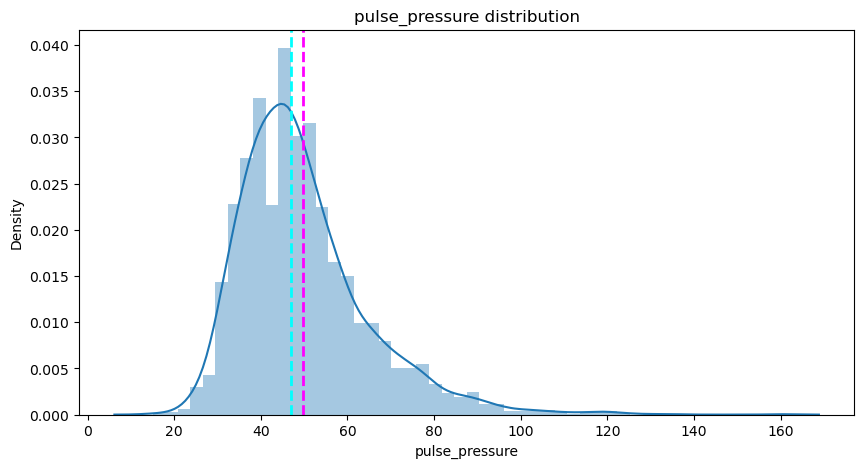

/tmp/wsuser/ipykernel_208/2037354159.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


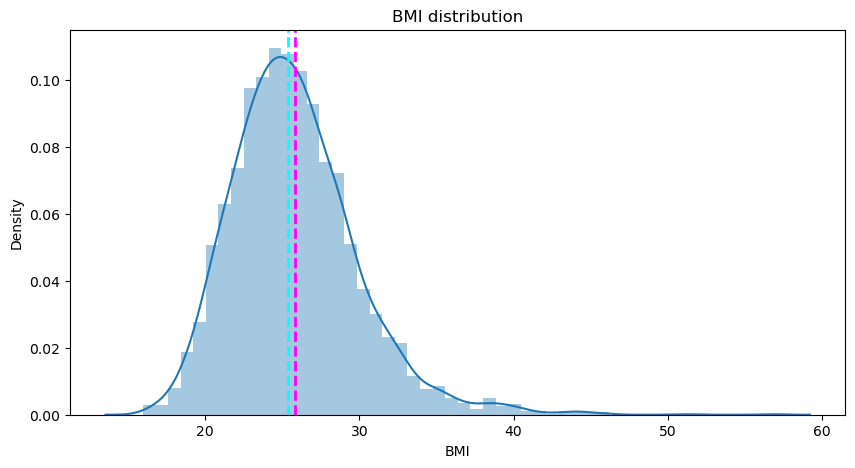

/tmp/wsuser/ipykernel_208/2037354159.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


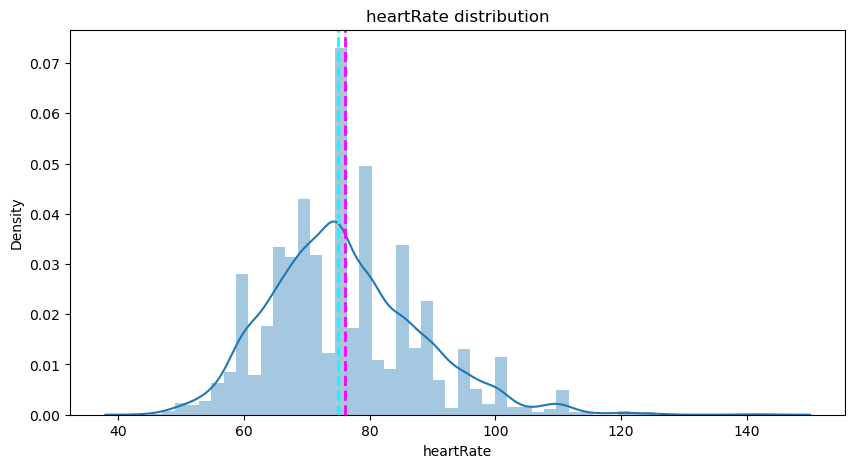

/tmp/wsuser/ipykernel_208/2037354159.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


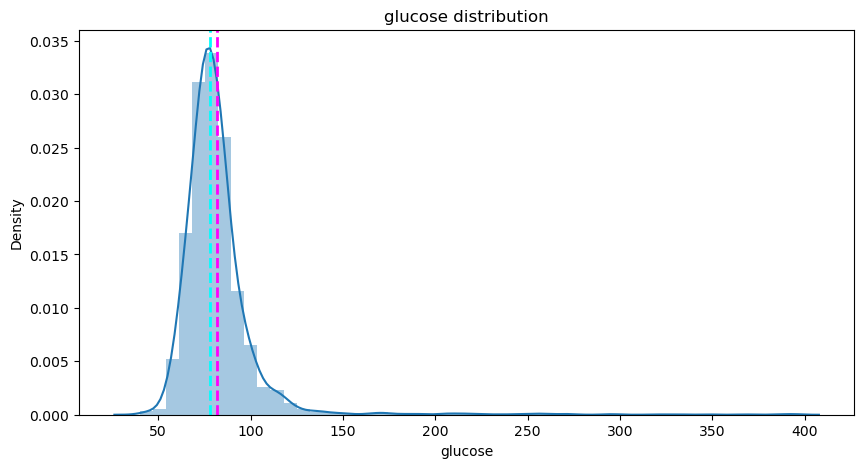

In [84]:
# Analysing the distribution of continuous varaibles after transformation
for col in continuous_var2:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

In [85]:
# Scaling your data
from sklearn.preprocessing import RobustScaler

#Dropping dependent column
df_sc = df.drop(['TenYearCHD'],axis=1)

#running for loop for applying RobustScaler to each column
for col in df_sc:
  Ro_scaler = RobustScaler()
  df[col] = Ro_scaler.fit_transform(df[[col]])


In [86]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,pulse_pressure
0,1.071429,0.0,0.0,1.0,0.15,0.0,0.0,0.0,0.0,-0.224138,0.000000,1.000000,0.142857,1,1.00000
1,-0.928571,1.0,1.0,0.0,0.00,0.0,0.0,1.0,0.0,-0.379310,0.883744,-0.200000,-0.214286,0,1.43750
2,-0.214286,-0.5,0.0,1.0,0.50,0.0,0.0,0.0,0.0,0.275862,-1.012582,0.866667,1.142857,0,-0.12500
3,0.071429,-0.5,1.0,1.0,1.00,0.0,0.0,1.0,0.0,-0.017241,0.579768,-0.466667,1.142857,1,1.43750
4,1.071429,-0.5,0.0,1.0,1.50,0.0,0.0,0.0,0.0,0.120690,0.209361,-0.333333,-0.071429,0,0.28125


In [87]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Creating the dataset with all independent variables
X = df.drop('TenYearCHD',axis=1)

# Creating the dataset with the dependent variable
Y = df['TenYearCHD']     

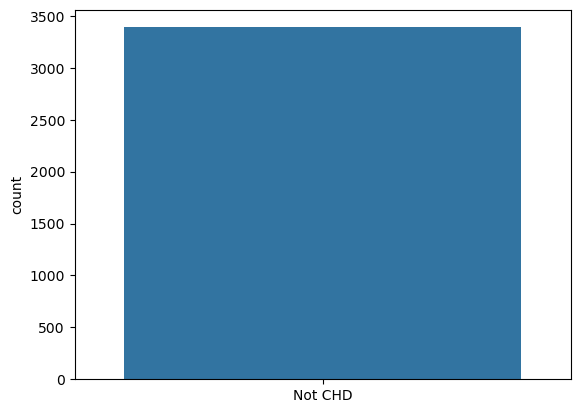

In [88]:
g = sns.countplot(df['TenYearCHD'])
g.set_xticklabels(['Not CHD'])
plt.show()

In [89]:
# import SMOTE module from library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, Y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3390
Resampled dataset shape 5758


<Axes: title={'center': 'count (TenYearCHD)'}>

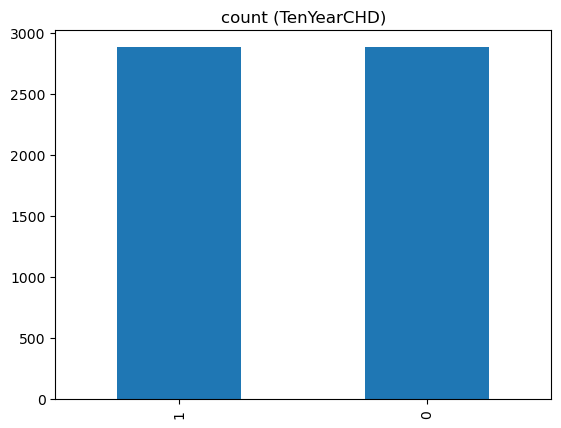

In [90]:
y_smote.value_counts().plot(kind='bar', title='count (TenYearCHD)',)

In [91]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.3, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4030, 14)
Number transactions y_train dataset:  (4030,)
Number transactions X_test dataset:  (1728, 14)
Number transactions y_test dataset:  (1728,)


In [92]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression

# Fit the Algorithm
lr = LogisticRegression(fit_intercept=True, max_iter=10000)
lr.fit(X_train, y_train)

# Predict on the model
train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)
print(f'train_preds {train_preds}')
print(f'test_preds  {test_preds}')

train_preds [0 1 0 ... 0 0 1]
test_preds  [1 0 1 ... 0 1 0]


In [93]:
# Get the accuracy scores
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6823821339950372
The accuracy on test data is  0.6805555555555556


confusion_matrix Score is 
[[1418  635]
 [ 645 1332]]

Axes(0.125,0.11;0.281818x0.77)
Axes(0.547727,0.11;0.281818x0.77)


/tmp/wsuser/ipykernel_208/3161110526.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


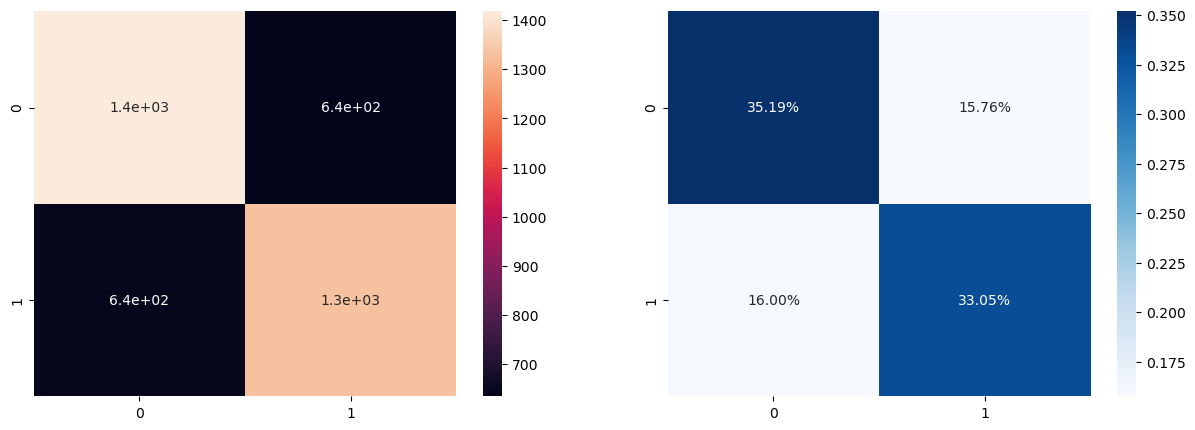

In [94]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_train, train_preds)

print(f'confusion_matrix Score is \n{cf_matrix}\n')

import seaborn as sns
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
print(sns.heatmap(cf_matrix, annot=True))
plt.subplot(1, 2, 2)
print(sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues'))

In [95]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# define a dictionary of hyperparameters and their values
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l2'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# create a GridSearchCV object
grid_search = GridSearchCV(lr, param_grid, cv=5)

# fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)


Best Hyperparameters:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy:  0.6816377171215882


In [96]:
# ML Model - 3 Implementation
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=2)
# Fit the Algorithm
kn.fit(X_train, y_train)

# Predict on the model
train_preds = kn.predict(X_train)
test_preds = kn.predict(X_test)
print(f'train_preds {train_preds}')
print(f'test_preds  {test_preds}')

train_preds [1 0 0 ... 0 0 0]
test_preds  [0 0 0 ... 1 0 0]


/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

In [97]:
# Get the accuracy scores
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9945409429280397
The accuracy on test data is  0.8842592592592593


confusion_matrix Score is 
[[2053    0]
 [  22 1955]]

Axes(0.125,0.11;0.281818x0.77)
Axes(0.547727,0.11;0.281818x0.77)


/tmp/wsuser/ipykernel_208/137309285.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


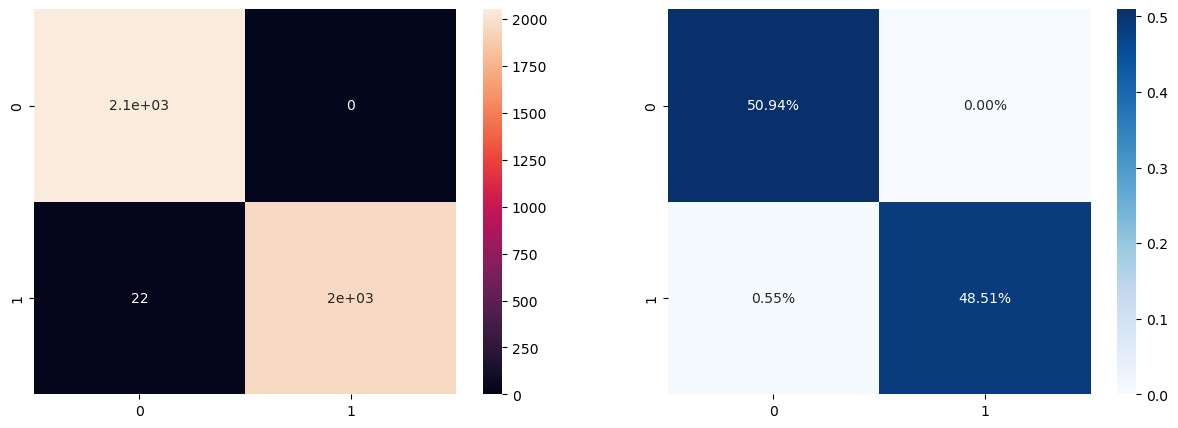

In [98]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_train, train_preds)

print(f'confusion_matrix Score is \n{cf_matrix}\n')

import seaborn as sns
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
print(sns.heatmap(cf_matrix, annot=True))
plt.subplot(1, 2, 2)
print(sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues'))

In [99]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV


# define a dictionary of hyperparameters and their values
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
              'metric': ['euclidean', 'manhattan', 'cosine'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}

# create a GridSearchCV object
grid_search = GridSearchCV(kn, param_grid, cv=5)

# fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)


/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

Best Hyperparameters:  {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 1}
Best Accuracy:  0.8590570719602978


/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

In [100]:
# ML Model - 3 Implementation
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=22)

# Fit the Algorithm
decision_tree.fit(X_train, y_train)

# Predict on the model
train_preds = decision_tree.predict(X_train)
test_preds = decision_tree.predict(X_test)
print(f'train_preds {train_preds}')
print(f'test_preds  {test_preds}')

train_preds [1 0 0 ... 0 0 0]
test_preds  [0 0 1 ... 1 1 0]


In [101]:
# Get the accuracy scores
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  1.0
The accuracy on test data is  0.7986111111111112


/tmp/wsuser/ipykernel_208/3161110526.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


confusion_matrix Score is 
[[2053    0]
 [   0 1977]]

Axes(0.125,0.11;0.281818x0.77)
Axes(0.547727,0.11;0.281818x0.77)


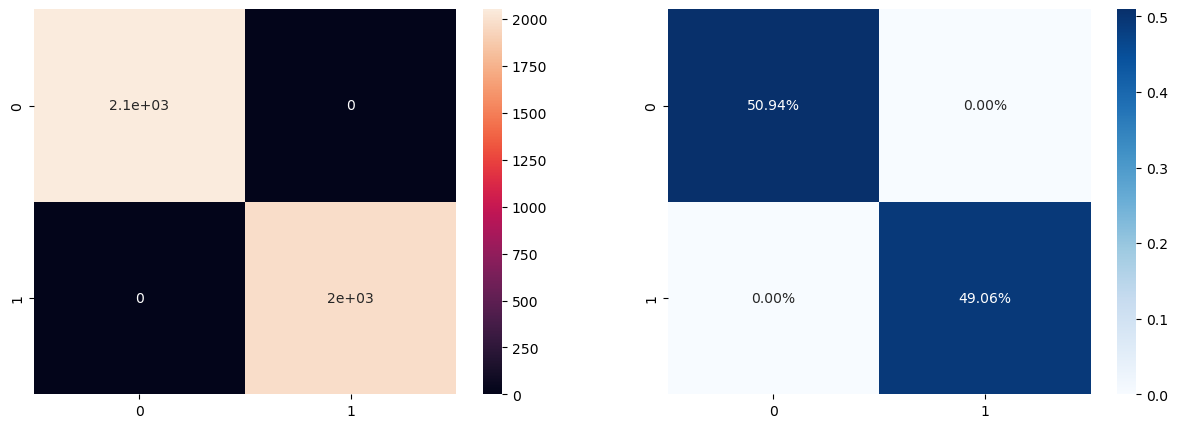

In [102]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_train, train_preds)

print(f'confusion_matrix Score is \n{cf_matrix}\n')

import seaborn as sns
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
print(sns.heatmap(cf_matrix, annot=True))
plt.subplot(1, 2, 2)
print(sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues'))

In [103]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# define a dictionary of hyperparameters and their values
param_grid = {'max_depth': [3, 5, 7, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'criterion': ['gini', 'entropy']}

# Fit the Algorithm
grid_search = GridSearchCV(decision_tree, param_grid, cv=5)

# fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)


Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Accuracy:  0.7799007444168735


In [104]:
# Save the File

import pickle
pickle.dump(kn,open('output.pkl','wb'))


In [105]:
model_loaded = pickle.load(open('output.pkl','rb'))
re = model_loaded.predict(X_test)
rf = pd.DataFrame(re)
print(rf)
#print("Loaded data:", model_loaded)

      0
0     0
1     0
2     0
3     1
4     1
...  ..
1723  0
1724  1
1725  1
1726  0
1727  0

[1728 rows x 1 columns]


/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
